In [1]:
from visual import *

floor = box (pos=(0,0,0), length=4, height=0.5, width=4, color=color.blue)
ball = sphere (pos=(0,4,0), radius=1, color=color.red)
ball.velocity = vector(0,-1,0)
dt = 0.01

while 1:
    rate (100)
    ball.pos = ball.pos + ball.velocity*dt
    if ball.y < ball.radius:
        ball.velocity.y = abs(ball.velocity.y)
    else:
        ball.velocity.y = ball.velocity.y - 9.8*dt

ModuleNotFoundError: No module named 'visual'

In [900]:
import numpy as np
import math as mt
import matplotlib
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        print(self.input.shape[0])
        self.weights1   = np.random.rand(self.input.shape[0],4)
        print('weights 1',self.weights1)
        self.weights2   = np.random.rand(4,1)
        print('weights 2',self.weights2)
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        #print(np.dot(self.input,self.weights1))        
        self.layer1 = self.sigmoid(np.dot(self.weights1.T, self.input))
        #print(np.dot(self.layer1,self.weights2))
        self.output = self.sigmoid(np.dot(self.weights2.T, self.layer1))
        print(self.output)
        
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
    #    print(self.sigmoid_derivative(self.output).shape)
    #    print(self.output.shape)
    #    print(self.y.shape)
    #    print(self.layer1.T.shape)
    #    d_weights2 = np.dot(self.layer1, (2*(self.y - self.output) * self.sigmoid_derivative(self.output)).T)
        z = np.dot(self.weights2.T, self.layer1)
        d_weights2 = np.dot(self.layer1, (2*(self.y - self.output) * self.sigmoid_derivative(z)).T)
    
    #    d_weights2 = np.dot(self.layer1, (2*(self.y - self.output) * (self.output * (1 - self.output))))
    
    #    print(self.weights2)
    #    print(d_weights2)
    #    print('input',self.input.shape)
        print('size of layer 1: ',self.layer1.shape)
        dot1 = np.dot(self.weights2,(2*(self.y - self.output) * self.sigmoid_derivative(z)))
        print('dot 1',dot1)
        print('size of output: ',self.output.shape)
        print('size of weights 2',self.weights2.shape)
        d_weights1 = np.dot(self.input,  (dot1 * (self.layer1*(1-self.layer1))))
        print('d_weights1',d_weights1.shape)
        print('weights1',self.weights1.shape)
        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
 
    def calcloss(self):
        self.loss = np.sum((self.y-self.output)*(self.y-self.output))
        
    def sigmoid(self,x):
        y = np.zeros(x.shape)
        for i in range(0,y.shape[0]):
            for j in range(0,y.shape[1]):
                y[i,j] = mt.exp(x[i,j])/(1 + mt.exp(x[i,j]))
        return y
    
    def sigmoid_derivative(self,x):
        y   = np.zeros(x.shape)
        sig = self.sigmoid(x)
        y   = sig*(1 - sig)
        return y
    
    def trainthis(self,num_iter):
        
        x = np.linspace(0,num_iter,num_iter)
        y = np.zeros(x.shape)
        #print(x,y)
        for i in range(0,num_iter):
            self.feedforward()
            self.backprop()
            self.calcloss()
            print('num iteration: ',i,' loss: ',self.loss)
            print('ouput: ',self.output)
            y[i] = self.loss

        plt.plot(x,y)
        plt.show()
        print('final weights, layer 1: ',self.weights1)
        print('final weights, layer 2: ',self.weights2)

In [901]:
import math as mt
def sigmoid(x):
    y = mt.exp(x)/(1 + mt.exp(x))
    return y
x = -100  
y = np.array([-500,0,100])
z = np.array([1,1,1])
print(np.dot(y,z))
print(sigmoid(x))


-400
3.720075976020836e-44


In [911]:
x = np.array([[1,1,0,0],[1,0,1,0],[0,0,1,1]])
print(x)
y = np.array([0,1,0,1])
#x = [1,1,0,0]
#y = [1,0,1,0]
#x = 1
#y = 0
NN = NeuralNetwork(x,y)

[[1 1 0 0]
 [1 0 1 0]
 [0 0 1 1]]
3
weights 1 [[0.81362296 0.16623144 0.91050215 0.70834647]
 [0.68032393 0.03002897 0.96314773 0.22115404]
 [0.48520988 0.82165628 0.48887043 0.89583212]]
weights 2 [[0.52284095]
 [0.53894406]
 [0.19333844]
 [0.50357271]]


In [912]:
print(NN.feedforward())

[[0.77755406 0.75572195 0.78791584 0.76411839]]
None


In [913]:
print(NN.calcloss())

None


In [914]:
print(NN.loss)

1.3407135813806987


In [915]:
print(np.sum((NN.output-NN.y)*(NN.output-NN.y)))

1.3407135813806987


In [916]:
NN.backprop()

size of layer 1:  (4, 4)
dot 1 [[-0.14063236  0.0471553  -0.13767893  0.04445784]
 [-0.14496373  0.04860765 -0.14191934  0.04582711]
 [-0.05200366  0.0174373  -0.05091153  0.01643982]
 [-0.13544964  0.04541749 -0.13260506  0.04281944]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)


[[0.59928111 0.59431373 0.61149207 0.60710532]]
size of layer 1:  (4, 4)
dot 1 [[-0.06261783  0.0425592  -0.06320895  0.04077682]
 [-0.09055726  0.06154867 -0.09141213  0.05897102]
 [ 0.03919885 -0.02664212  0.03956889 -0.02552635]
 [-0.06710232  0.04560715 -0.06773578  0.04369713]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  0  loss:  1.0520079786312402
ouput:  [[0.59928111 0.59431373 0.61149207 0.60710532]]
[[0.4649135  0.47719282 0.47678776 0.49197796]]
size of layer 1:  (4, 4)
dot 1 [[-0.00361693  0.00407895 -0.00371963  0.00397084]
 [-0.04314496  0.04865626 -0.04437004  0.04736663]
 [ 0.08399685 -0.09472654  0.0863819  -0.09221582]
 [-0.01617866  0.01824531 -0.01663805  0.01776172]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1  loss:  0.974884874251337
ouput:  [[0.4649135  0.47719282 0.47678776 0.49197796]]
[[0.45247154 0.46809623 0.46547368 0.48437477]]
size of layer 1: 

num iteration:  57  loss:  0.0545313234359268
ouput:  [[0.14560316 0.96653556 0.05506127 0.82918012]]
[[0.14300448 0.96776315 0.05393868 0.83228666]]
size of layer 1:  (4, 4)
dot 1 [[ 0.05872558 -0.00336995  0.00922294 -0.07844362]
 [-0.11291431  0.00647956 -0.01773336  0.15082706]
 [ 0.07751553 -0.00444821  0.01217393 -0.10354258]
 [-0.10261007  0.00588825 -0.01611507  0.13706301]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  58  loss:  0.05252664117361343
ouput:  [[0.14300448 0.96776315 0.05393868 0.83228666]]
[[0.14051057 0.96891416 0.05287085 0.83527313]]
size of layer 1:  (4, 4)
dot 1 [[ 0.05729773 -0.00316147  0.00893965 -0.0765308 ]
 [-0.10986892  0.00606215 -0.01714187  0.14674851]
 [ 0.07527935 -0.00415363  0.01174516 -0.10054829]
 [-0.10019296  0.00552827 -0.01563221  0.13382462]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  59  loss:  0.05063981761761557
ouput:  [[0.14

size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  110  loss:  0.01570398675414485
ouput:  [[0.0798645  0.98972053 0.02876875 0.90839029]]
[[0.07929202 0.98985929 0.0285513  0.90907613]]
size of layer 1:  (4, 4)
dot 1 [[ 0.02430734 -0.00042743  0.00332528 -0.03155823]
 [-0.042557    0.00074834 -0.00582186  0.05525178]
 [ 0.02800221 -0.0004924   0.00383074 -0.03635528]
 [-0.04320655  0.00075976 -0.00591072  0.05609509]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  111  loss:  0.015472384302558765
ouput:  [[0.07929202 0.98985929 0.0285513  0.90907613]]
[[0.07873066 0.98999443 0.02833816 0.90974842]]
size of layer 1:  (4, 4)
dot 1 [[ 0.02403672 -0.00041717  0.00328442 -0.03119117]
 [-0.04203639  0.00072957 -0.00574393  0.05454839]
 [ 0.0276516  -0.00047991  0.00377837 -0.03588201]
 [-0.04273184  0.00074164 -0.00583896  0.05545084]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4

size of layer 1:  (4, 4)
dot 1 [[ 0.01540661 -0.00016132  0.00201346 -0.01959406]
 [-0.02582495  0.00027041 -0.00337501  0.03284406]
 [ 0.01684184 -0.00017635  0.00220103 -0.02141938]
 [-0.02754895  0.00028847 -0.00360032  0.03503662]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  163  loss:  0.008605433722589782
ouput:  [[0.05965622 0.99406273 0.02113763 0.93243878]]
[[0.05940409 0.99410988 0.02104288 0.93273643]]
size of layer 1:  (4, 4)
dot 1 [[ 0.01530077 -0.00015899  0.00199826 -0.01945343]
 [-0.02563139  0.00026633 -0.00334742  0.03258781]
 [ 0.01671401 -0.00017367  0.00218282 -0.02125024]
 [-0.02736222  0.00028431 -0.00357346  0.0347884 ]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  164  loss:  0.008530729835192685
ouput:  [[0.05940409 0.99410988 0.02104288 0.93273643]]
[[0.05915502 0.9941563  0.02094929 0.93303039]]
size of layer 1:  (4, 4)
dot 1 [[ 0.01519644 -0.0001567 

weights1 (3, 4)
num iteration:  215  loss:  0.005892232330643786
ouput:  [[0.0496232  0.99580986 0.01737361 0.9442293 ]]
[[0.04947635 0.99583347 0.01731861 0.94440102]]
size of layer 1:  (4, 4)
dot 1 [[ 1.13327767e-02 -8.42004030e-05  1.43554578e-03 -1.42189737e-02]
 [-1.84861530e-02  1.37348645e-04 -2.34167844e-03  2.31941499e-02]
 [ 1.20154174e-02 -8.92722951e-05  1.52201726e-03 -1.50754672e-02]
 [-2.03540301e-02  1.51226622e-04 -2.57828622e-03  2.55377323e-02]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  216  loss:  0.005856449923249571
ouput:  [[0.04947635 0.99583347 0.01731861 0.94440102]]
[[0.04933079 0.99585681 0.0172641  0.9445712 ]]
size of layer 1:  (4, 4)
dot 1 [[ 1.12776640e-02 -8.33334251e-05  1.42783585e-03 -1.41468331e-02]
 [-1.83885519e-02  1.35877520e-04 -2.32812697e-03  2.30668138e-02]
 [ 1.19515020e-02 -8.83125797e-05  1.51314874e-03 -1.49921034e-02]
 [-2.02565712e-02  1.49680773e-04 -2.56463206e-03  2.54100790e-

size of layer 1:  (4, 4)
dot 1 [[ 8.90314871e-03 -5.03119232e-05  1.09880637e-03 -1.10557959e-02]
 [-1.42321855e-02  8.04264479e-05 -1.75650397e-03  1.76733135e-02]
 [ 9.23610811e-03 -5.21934854e-05  1.13989946e-03 -1.14692598e-02]
 [-1.60541584e-02  9.07224639e-05 -1.98136773e-03  1.99358120e-02]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  273  loss:  0.004347361975882735
ouput:  [[0.04279595 0.99684751 0.01481958 0.95218462]]
[[0.04270196 0.99686093 0.01478446 0.95229374]]
size of layer 1:  (4, 4)
dot 1 [[ 8.87047036e-03 -4.99160018e-05  1.09432439e-03 -1.10135059e-02]
 [-1.41756902e-02  7.97695895e-05 -1.74881409e-03  1.76004250e-02]
 [ 9.19928483e-03 -5.17663100e-05  1.13488928e-03 -1.14217594e-02]
 [-1.59962744e-02  9.00143994e-05 -1.97341432e-03  1.98608479e-02]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  274  loss:  0.004327778101165695
ouput:  [[0.04270196 0.99686093 

dot 1 [[ 7.44749799e-03 -3.41998165e-05  9.00549543e-04 -9.17932604e-03]
 [-1.17361671e-02  5.38939066e-05 -1.41913431e-03  1.44652747e-02]
 [ 7.61134151e-03 -3.49522059e-05  9.20361459e-04 -9.38126944e-03]
 [-1.34742085e-02  6.18752043e-05 -1.62929783e-03  1.66074772e-02]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  327  loss:  0.003494464960069287
ouput:  [[0.0384769  0.99743998 0.01320735 0.95718639]]
[[0.0384091  0.99744888 0.01318206 0.95726471]]
size of layer 1:  (4, 4)
dot 1 [[ 7.42541242e-03 -3.39793073e-05  8.97564866e-04 -9.15097652e-03]
 [-1.16986349e-02  5.35339303e-05 -1.41410107e-03  1.44172374e-02]
 [ 7.58694279e-03 -3.47184837e-05  9.17090243e-04 -9.35004432e-03]
 [-1.34350391e-02  6.14798610e-05 -1.62399318e-03  1.65571581e-02]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  328  loss:  0.0034818392113984036
ouput:  [[0.0384091  0.99744888 0.01318206 0.95726471]]


[[0.03501713 0.99787794 0.01191838 0.96117475]]
size of layer 1:  (4, 4)
dot 1 [[ 6.35203625e-03 -2.41226271e-05  7.53458918e-04 -7.77791380e-03]
 [-9.88777414e-03  3.75500200e-05 -1.17285722e-03  1.21073388e-02]
 [ 6.41085477e-03 -2.43459975e-05  7.60435789e-04 -7.84993564e-03]
 [-1.15303049e-02  4.37877296e-05 -1.36768915e-03  1.41185777e-02]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  386  loss:  0.0028801507394724014
ouput:  [[0.03501713 0.99787794 0.01191838 0.96117475]]
[[0.03496657 0.9978841  0.01189956 0.96123291]]
size of layer 1:  (4, 4)
dot 1 [[ 6.33651231e-03 -2.39924344e-05  7.51389306e-04 -7.75812666e-03]
 [-9.86178209e-03  3.73404403e-05 -1.16941895e-03  1.20743006e-02]
 [ 6.39398935e-03 -2.42100642e-05  7.58204984e-04 -7.82849882e-03]
 [-1.15027407e-02  4.35537307e-05 -1.36400529e-03  1.40834129e-02]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  387  loss:  0.00

size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  452  loss:  0.002409967975287769
ouput:  [[0.03210327 0.99822075 0.01083503 0.96452065]]
[[0.03206482 0.99822511 0.01082075 0.96456473]]
size of layer 1:  (4, 4)
dot 1 [[ 5.46994556e-03 -1.72841899e-05  6.36603163e-04 -6.65705508e-03]
 [-8.42052059e-03  2.66075549e-05 -9.79996964e-04  1.02479757e-02]
 [ 5.45945417e-03 -1.72510387e-05  6.35382154e-04 -6.64428681e-03]
 [-9.96319461e-03  3.14821684e-05 -1.15953644e-03  1.21254471e-02]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  453  loss:  0.002404049729193748
ouput:  [[0.03206482 0.99822511 0.01082075 0.96456473]]
[[0.0320265  0.99822945 0.01080652 0.96460864]]
size of layer 1:  (4, 4)
dot 1 [[ 5.45882957e-03 -1.72052834e-05  6.35140803e-04 -6.64297701e-03]
 [-8.40216048e-03  2.64821515e-05 -9.77600580e-04  1.02247850e-02]
 [ 5.44755727e-03 -1.71697550e-05  6.33829259e-04 -6.62925948e-03]
 [-9.94343383e-03  3

[[0.03024667 0.99842637 0.0101461  0.96664607]]
size of layer 1:  (4, 4)
dot 1 [[ 4.95201726e-03 -1.38002688e-05  5.68767474e-04 -6.00243326e-03]
 [-7.56872345e-03  2.10924988e-05 -8.69311130e-04  9.17419205e-03]
 [ 4.90771442e-03 -1.36768058e-05  5.63679040e-04 -5.94873296e-03]
 [-9.04210843e-03  2.51985243e-05 -1.03853781e-03  1.09601097e-02]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  505  loss:  0.0021327654911846745
ouput:  [[0.03024667 0.99842637 0.0101461  0.96664607]]
[[0.03021485 0.9984298  0.0101343  0.96668245]]
size of layer 1:  (4, 4)
dot 1 [[ 4.94312854e-03 -1.37439162e-05  5.67608855e-04 -5.99122273e-03]
 [-7.55417172e-03  2.10036826e-05 -8.67429347e-04  9.15588679e-03]
 [ 4.89829227e-03 -1.36192530e-05  5.62460403e-04 -5.93687980e-03]
 [-9.02629371e-03  2.50967830e-05 -1.03646996e-03  1.09401436e-02]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  506  loss:  0.00

d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  561  loss:  0.0019033380972087043
ouput:  [[0.02861408 0.99859869 0.00954133 0.96851077]]
[[0.02858744 0.99860144 0.00953147 0.96854117]]
size of layer 1:  (4, 4)
dot 1 [[ 4.49682163e-03 -1.10638987e-05  5.09697146e-04 -5.42943698e-03]
 [-6.82656771e-03  1.67959639e-05 -7.73764754e-04  8.24235922e-03]
 [ 4.42731744e-03 -1.08928919e-05  5.01819118e-04 -5.34551802e-03]
 [-8.23189177e-03  2.02535979e-05 -9.33052740e-04  9.93913954e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  562  loss:  0.001899704661407708
ouput:  [[0.02858744 0.99860144 0.00953147 0.96854117]]
[[0.02856087 0.99860417 0.00952164 0.96857147]]
size of layer 1:  (4, 4)
dot 1 [[ 4.48967213e-03 -1.10233547e-05  5.08773823e-04 -5.42045561e-03]
 [-6.81496185e-03  1.67325674e-05 -7.72277817e-04  8.22781644e-03]
 [ 4.41980724e-03 -1.08518176e-05  5.00856668e-04 -5.33610657e-03]
 [-8.21916038e-03  2.01802531e-05 -9.3140290

d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  612  loss:  0.0017347621063714984
ouput:  [[0.02734913 0.99872661 0.00907354 0.96995277]]
[[0.0273261  0.99872889 0.00906503 0.969979  ]]
size of layer 1:  (4, 4)
dot 1 [[ 4.16225001e-03 -9.24740739e-06  4.66648108e-04 -5.00977522e-03]
 [-6.28520978e-03  1.39640568e-05 -7.04662442e-04  7.56501607e-03]
 [ 4.07707293e-03 -9.05816669e-06  4.57098533e-04 -4.90725423e-03]
 [-7.63589453e-03  1.69649174e-05 -8.56093635e-04  9.19072981e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  613  loss:  0.0017317664589468588
ouput:  [[0.0273261  0.99872889 0.00906503 0.969979  ]]
[[0.02730313 0.99873116 0.00905654 0.97000517]]
size of layer 1:  (4, 4)
dot 1 [[ 4.15624991e-03 -9.21633999e-06  4.65879153e-04 -5.00226123e-03]
 [-6.27553463e-03  1.39157804e-05 -7.03432379e-04  7.55292976e-03]
 [ 4.07081464e-03 -9.02689025e-06  4.56302609e-04 -4.89943548e-03]
 [-7.62520197e-03  1.69086209e-05 -8.547182

num iteration:  662  loss:  0.0015971301741224593
ouput:  [[0.02626887 0.99883188 0.00867468 0.97118226]]
[[0.02624865 0.99883381 0.00866722 0.97120526]]
size of layer 1:  (4, 4)
dot 1 [[ 3.88448930e-03 -7.86503597e-06  4.31172083e-04 -4.66239619e-03]
 [-5.83860094e-03  1.18215814e-05 -6.48075341e-04  7.00783776e-03]
 [ 3.78823143e-03 -7.67013993e-06  4.20487614e-04 -4.54686175e-03]
 [-7.14074158e-03  1.44580626e-05 -7.92610864e-04  8.57074477e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  663  loss:  0.0015946095162574035
ouput:  [[0.02624865 0.99883381 0.00866722 0.97120526]]
[[0.02622848 0.99883574 0.00865978 0.9712282 ]]
size of layer 1:  (4, 4)
dot 1 [[ 3.87936123e-03 -7.84058783e-06  4.30519514e-04 -4.65599189e-03]
 [-5.83038058e-03  1.17837985e-05 -6.47037608e-04  6.99759652e-03]
 [ 3.78291579e-03 -7.64566167e-06  4.19816296e-04 -4.54023850e-03]
 [-7.13159665e-03  1.44136899e-05 -7.91442544e-04  8.55931020e-03]]
size of o

size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  715  loss:  0.0014741014707108234
ouput:  [[0.02526213 0.99892662 0.00830354 0.97232645]]
[[0.02524432 0.99892827 0.00829698 0.97234667]]
size of layer 1:  (4, 4)
dot 1 [[ 3.63237722e-03 -6.70921771e-06  3.99198878e-04 -4.34794330e-03]
 [-5.43557283e-03  1.00398277e-05 -5.97370386e-04  6.50636238e-03]
 [ 3.52764840e-03 -6.51577733e-06  3.87689164e-04 -4.22258326e-03]
 [-6.69099395e-03  1.23586655e-05 -7.35341381e-04  8.00909722e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  716  loss:  0.0014719704828004554
ouput:  [[0.02524432 0.99892827 0.00829698 0.97234667]]
[[0.02522655 0.99892991 0.00829043 0.97236685]]
size of layer 1:  (4, 4)
dot 1 [[ 3.62797671e-03 -6.68988005e-06  3.98642838e-04 -4.34246209e-03]
 [-5.42855863e-03  1.00100990e-05 -5.96491155e-04  6.49764647e-03]
 [ 3.52311385e-03 -6.49651608e-06  3.87120485e-04 -4.21694778e-03]
 [-6.68314089e-03 

[[0.02437108 0.99900772 0.00797558 0.97333779]]
size of layer 1:  (4, 4)
dot 1 [[ 3.41860726e-03 -5.80302296e-06  3.72272755e-04 -4.08197919e-03]
 [-5.09567143e-03  8.64980856e-06 -5.54898384e-04  6.08447335e-03]
 [ 3.30792938e-03 -5.61514929e-06  3.60220374e-04 -3.94982455e-03]
 [-6.30938004e-03  1.07100566e-05 -6.87066433e-04  7.53369899e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  768  loss:  0.0013694177538581653
ouput:  [[0.02437108 0.99900772 0.00797558 0.97333779]]
[[0.02435524 0.99900914 0.00796975 0.97335576]]
size of layer 1:  (4, 4)
dot 1 [[ 3.41477645e-03 -5.78740227e-06  3.71791868e-04 -4.07721882e-03]
 [-5.08959616e-03  8.62590592e-06 -5.54141829e-04  6.07694165e-03]
 [ 3.30400258e-03 -5.59966144e-06  3.59731101e-04 -3.94495560e-03]
 [-6.30253903e-03  1.06816154e-05 -6.86203855e-04  7.52518682e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  769  loss:  0.00

weights1 (3, 4)
num iteration:  820  loss:  0.0012808310805110185
ouput:  [[0.02358944 0.99907667 0.00768833 0.97422392]]
[[0.0235752  0.99907791 0.0076831  0.97424005]]
size of layer 1:  (4, 4)
dot 1 [[ 3.22824802e-03 -5.05316245e-06  3.48450045e-04 -3.84568103e-03]
 [-4.79447644e-03  7.50477291e-06 -5.17505322e-04  5.71146547e-03]
 [ 3.11326411e-03 -4.87317864e-06  3.36038933e-04 -3.70870536e-03]
 [-5.96932934e-03  9.34376500e-06 -6.44316380e-04  7.11102011e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  821  loss:  0.0012792454687499994
ouput:  [[0.0235752  0.99907791 0.0076831  0.97424005]]
[[0.02356099 0.99907914 0.00767788 0.97425615]]
size of layer 1:  (4, 4)
dot 1 [[ 3.22488840e-03 -5.04041146e-06  3.48030982e-04 -3.84151535e-03]
 [-4.78917362e-03  7.48534604e-06 -5.16849140e-04  5.70490562e-03]
 [ 3.10983710e-03 -4.86058947e-06  3.35614609e-04 -3.70446524e-03]
 [-5.96332576e-03  9.32051339e-06 -6.43564013e-04  7.10356595

 [-5.67493795e-03  8.23915987e-06 -6.07525378e-04  6.74584238e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  873  loss:  0.0012021357531845757
ouput:  [[0.02287155 0.99913817 0.00742491 0.97503691]]
[[0.02285868 0.99913926 0.0074202  0.97505147]]
size of layer 1:  (4, 4)
dot 1 [[ 3.06057720e-03 -4.43724567e-06  3.27596871e-04 -3.63798640e-03]
 [-4.53038746e-03  6.56818659e-06 -4.84921849e-04  5.38509140e-03]
 [ 2.94260336e-03 -4.26620639e-06  3.14969233e-04 -3.49775559e-03]
 [-5.66961085e-03  8.21984042e-06 -6.06861599e-04  6.73924094e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  874  loss:  0.0012007487873670355
ouput:  [[0.02285868 0.99913926 0.0074202  0.97505147]]
[[0.02284584 0.99914034 0.00741549 0.975066  ]]
size of layer 1:  (4, 4)
dot 1 [[ 3.05760469e-03 -4.42670313e-06  3.27228337e-04 -3.63430817e-03]
 [-4.52571611e-03  6.55218830e-06 -4.84347293e-04  5.3793242

num iteration:  927  loss:  0.001131785333784452
ouput:  [[0.02220916 0.99919334 0.00718224 0.9757863 ]]
[[0.02219748 0.9991943  0.00717796 0.9757995 ]]
size of layer 1:  (4, 4)
dot 1 [[ 2.90901078e-03 -3.91640515e-06  3.08859289e-04 -3.45060990e-03]
 [-4.29267666e-03  5.77923639e-06 -4.55767668e-04  5.09188644e-03]
 [ 2.78900434e-03 -3.75484032e-06  2.96117809e-04 -3.30826068e-03]
 [-5.39850435e-03  7.26801370e-06 -5.73177049e-04  6.40359694e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  928  loss:  0.0011305644675687937
ouput:  [[0.02219748 0.9991943  0.00717796 0.9757995 ]]
[[0.02218582 0.99919525 0.0071737  0.97581269]]
size of layer 1:  (4, 4)
dot 1 [[ 2.90636591e-03 -3.90761900e-06  3.08533308e-04 -3.44734333e-03]
 [-4.28853730e-03  5.76595322e-06 -4.55261534e-04  5.08678567e-03]
 [ 2.78632977e-03 -3.74623001e-06  2.95790541e-04 -3.30496423e-03]
 [-5.39377189e-03  7.25194494e-06 -5.72590768e-04  6.39774348e-03]]
size of ou

[[0.02159545 0.99924307 0.00695775 0.97647998]]
size of layer 1:  (4, 4)
dot 1 [[ 2.77368038e-03 -3.48016153e-06  2.92225617e-04 -3.28361381e-03]
 [-4.08127391e-03  5.12081080e-06 -4.29989265e-04  4.83160478e-03]
 [ 2.65241486e-03 -3.32800860e-06  2.79449491e-04 -3.14005396e-03]
 [-5.15628515e-03  6.46963701e-06 -5.43248828e-04  6.10425385e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  982  loss:  0.0010685381357462022
ouput:  [[0.02159545 0.99924307 0.00695775 0.97647998]]
[[0.02158481 0.99924392 0.00695386 0.97649201]]
size of layer 1:  (4, 4)
dot 1 [[ 2.77131031e-03 -3.47276346e-06  2.91935158e-04 -3.28069183e-03]
 [-4.07757884e-03  5.10966483e-06 -4.29539999e-04  4.82705945e-03]
 [ 2.65002751e-03 -3.32078248e-06  2.79158996e-04 -3.13711662e-03]
 [-5.15204175e-03  6.45608767e-06 -5.42725988e-04  6.09901433e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  983  loss:  0.00

 [-4.90045521e-03  5.67964795e-06 -5.11821809e-04  5.78866085e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1046  loss:  0.0010037460388850512
ouput:  [[0.02094719 0.99929413 0.00672101 0.97721205]]
[[0.02093757 0.99929488 0.0067175  0.97722291]]
size of layer 1:  (4, 4)
dot 1 [[ 2.62874395e-03 -3.04305129e-06  2.74519473e-04 -3.10509954e-03]
 [-3.85578242e-03  4.46347910e-06 -4.02658980e-04  4.55449007e-03]
 [ 2.50673103e-03 -2.90180834e-06  2.61777676e-04 -2.96097662e-03]
 [-4.89669625e-03  5.66844780e-06 -5.11361509e-04  5.78402826e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1047  loss:  0.0010027996697971938
ouput:  [[0.02093757 0.99929488 0.0067175  0.97722291]]
[[0.02092796 0.99929562 0.00671399 0.97723376]]
size of layer 1:  (4, 4)
dot 1 [[ 2.62664983e-03 -3.03696359e-06  2.74264504e-04 -3.10252289e-03]
 [-3.85253154e-03  4.45434250e-06 -4.02266277e-04  4.55049

dot 1 [[ 2.52854715e-03 -2.75903926e-06  2.62348555e-04 -2.98190025e-03]
 [-3.70047073e-03  4.03779064e-06 -3.83941090e-04  4.36394259e-03]
 [ 2.40639228e-03 -2.62574925e-06  2.49674418e-04 -2.83784376e-03]
 [-4.71712229e-03  5.14711603e-06 -4.89423429e-04  5.56287357e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1097  loss:  0.0009577836051299145
ouput:  [[0.02047428 0.99933042 0.00654858 0.97774567]]
[[0.02046536 0.99933109 0.00654533 0.97775573]]
size of layer 1:  (4, 4)
dot 1 [[ 2.52663281e-03 -2.75375737e-06  2.62116597e-04 -2.97954814e-03]
 [-3.69750805e-03  4.02988515e-06 -3.83584913e-04  4.36031037e-03]
 [ 2.40447827e-03 -2.62062209e-06  2.49444106e-04 -2.83549661e-03]
 [-4.71369040e-03  5.13741436e-06 -4.89005162e-04  5.55865000e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1098  loss:  0.000956927025573308
ouput:  [[0.02046536 0.99933109 0.00654533 0.97775573]

[[0.01998544 0.99936705 0.0063706  0.97829687]]
size of layer 1:  (4, 4)
dot 1 [[ 2.42451877e-03 -2.47984853e-06  2.49776108e-04 -2.85417818e-03]
 [-3.53973317e-03  3.62051316e-06 -3.64666500e-04  4.16702452e-03]
 [ 2.30255034e-03 -2.35509667e-06  2.37210811e-04 -2.71059520e-03]
 [-4.53057236e-03  4.63396421e-06 -4.66743646e-04  5.33345458e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1154  loss:  0.0009114286598948397
ouput:  [[0.01998544 0.99936705 0.0063706  0.97829687]]
[[0.0199772  0.99936766 0.00636761 0.97830615]]
size of layer 1:  (4, 4)
dot 1 [[ 2.42278165e-03 -2.47532184e-06  2.49566739e-04 -2.85204706e-03]
 [-3.53705361e-03  3.61375780e-06 -3.64346055e-04  4.16374434e-03]
 [ 2.30081927e-03 -2.35071460e-06  2.37003595e-04 -2.70847554e-03]
 [-4.52745624e-03  4.62563820e-06 -4.66365796e-04  5.32962527e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1155  loss:  0.

[[0.01965685 0.99939118 0.00625113 0.97866715]]
size of layer 1:  (4, 4)
dot 1 [[ 2.35558006e-03 -2.30361381e-06  2.41482088e-04 -2.76964667e-03]
 [-3.43350977e-03  3.35776341e-06 -3.51985960e-04  4.03705612e-03]
 [ 2.23392709e-03 -2.18464463e-06  2.29010845e-04 -2.62660940e-03]
 [-4.40688196e-03  4.30966212e-06 -4.51771127e-04  5.18152881e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1195  loss:  0.0008809293905840307
ouput:  [[0.01965685 0.99939118 0.00625113 0.97866715]]
[[0.01964906 0.99939174 0.00624829 0.97867593]]
size of layer 1:  (4, 4)
dot 1 [[ 2.35395512e-03 -2.29954413e-06  2.41286965e-04 -2.76765526e-03]
 [-3.43100889e-03  3.35170213e-06 -3.51687981e-04  4.03399782e-03]
 [ 2.23231146e-03 -2.18071224e-06  2.28818151e-04 -2.62463312e-03]
 [-4.40396582e-03  4.30216944e-06 -4.51418779e-04  5.17794883e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1196  loss:  0.

d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1241  loss:  0.0008491981396960661
ouput:  [[0.01930877 0.99941629 0.00612471 0.97905921]]
[[0.01930143 0.99941681 0.00612204 0.97906748]]
size of layer 1:  (4, 4)
dot 1 [[ 2.28191127e-03 -2.12300639e-06  2.32653674e-04 -2.67941368e-03]
 [-3.32026553e-03  3.08905304e-06 -3.38519725e-04  3.89864628e-03]
 [ 2.16076835e-03 -2.01029947e-06  2.20302473e-04 -2.53716801e-03]
 [-4.27464353e-03  3.97697126e-06 -4.35823924e-04  5.01927420e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1242  loss:  0.0008485353708745501
ouput:  [[0.01930143 0.99941681 0.00612204 0.97906748]]
[[0.0192941  0.99941733 0.00611938 0.97907573]]
size of layer 1:  (4, 4)
dot 1 [[ 2.28040162e-03 -2.11938857e-06  2.32473144e-04 -2.67756567e-03]
 [-3.31794782e-03  3.08367641e-06 -3.38244699e-04  3.89581515e-03]
 [ 2.15927104e-03 -2.00681070e-06  2.20124615e-04 -2.53533850e-03]
 [-4.27193296e-03  3.97030322e-06 -4.3549

[[0.01887737 0.99944676 0.00596824 0.97954486]]
size of layer 1:  (4, 4)
dot 1 [[ 2.19524618e-03 -1.92071937e-06  2.22315693e-04 -2.57339582e-03]
 [-3.18740567e-03  2.78880423e-06 -3.22793092e-04  3.73646315e-03]
 [ 2.07493701e-03 -1.81545548e-06  2.10131813e-04 -2.43236239e-03]
 [-4.11899013e-03  3.60388926e-06 -4.17135970e-04  4.82852087e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1302  loss:  0.000810693880113186
ouput:  [[0.01887737 0.99944676 0.00596824 0.97954486]]
[[0.01887056 0.99944724 0.00596577 0.97955251]]
size of layer 1:  (4, 4)
dot 1 [[ 2.19386613e-03 -1.91758702e-06  2.22151504e-04 -2.57170879e-03]
 [-3.18529324e-03  2.78416121e-06 -3.22543694e-04  3.73388628e-03]
 [ 2.07357231e-03 -1.81244211e-06  2.09970518e-04 -2.43069715e-03]
 [-4.11651073e-03  3.59810812e-06 -4.16839039e-04  4.82548443e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1303  loss:  0.0

[[0.01855319 0.99946919 0.00585083 0.97990958]]
size of layer 1:  (4, 4)
dot 1 [[ 2.12990787e-03 -1.77546690e-06  2.14557480e-04 -2.49356517e-03]
 [-3.08750579e-03  2.57370960e-06 -3.11021650e-04  3.61466193e-03]
 [ 2.01039806e-03 -1.67584488e-06  2.02518591e-04 -2.35365043e-03]
 [-4.00157492e-03  3.33566719e-06 -4.03100923e-04  4.68479786e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1351  loss:  0.0007823597757576203
ouput:  [[0.01855319 0.99946919 0.00585083 0.97990958]]
[[0.01854677 0.99946963 0.00584851 0.97991681]]
size of layer 1:  (4, 4)
dot 1 [[ 2.12862126e-03 -1.77266912e-06  2.14405026e-04 -2.49199404e-03]
 [-3.08554093e-03  2.56957084e-06 -3.10790603e-04  3.61226761e-03]
 [ 2.00912868e-03 -1.67315832e-06  2.02369157e-04 -2.35210312e-03]
 [-3.99926224e-03  3.33049791e-06 -4.02825032e-04  4.68196849e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1352  loss:  0.

ouput:  [[0.01825302 0.99948958 0.00574225 0.98024715]]
[[0.01824694 0.99948999 0.00574005 0.98025398]]
size of layer 1:  (4, 4)
dot 1 [[ 2.06891393e-03 -1.64548212e-06  2.07344068e-04 -2.41912051e-03]
 [-2.99445919e-03  2.38160176e-06 -3.00101102e-04  3.50133349e-03]
 [ 1.95028569e-03 -1.55113279e-06  1.95455288e-04 -2.28041198e-03]
 [-3.89191278e-03  3.09537907e-06 -3.90042823e-04  4.55069971e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1400  loss:  0.0007560643304008479
ouput:  [[0.01824694 0.99948999 0.00574005 0.98025398]]
[[0.01824087 0.9994904  0.00573786 0.98026082]]
size of layer 1:  (4, 4)
dot 1 [[ 2.06771124e-03 -1.64297339e-06  2.07202121e-04 -2.41765336e-03]
 [-2.99262656e-03  2.37789770e-06 -2.99886444e-04  3.49910254e-03]
 [ 1.94910171e-03 -1.54872798e-06  1.95316445e-04 -2.27897020e-03]
 [-3.88974990e-03  3.09073890e-06 -3.89785776e-04  4.54805620e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights

ouput:  [[0.01794551 0.99951011 0.00563115 0.98059282]]
[[0.01793976 0.99951049 0.00562907 0.98059928]]
size of layer 1:  (4, 4)
dot 1 [[ 2.00845321e-03 -1.52196147e-06  2.00222392e-04 -2.34540276e-03]
 [-2.90243139e-03  2.19939838e-06 -2.89342939e-04  3.38935979e-03]
 [ 1.89083035e-03 -1.43282947e-06  1.88496587e-04 -2.20804682e-03]
 [-3.78315511e-03  2.86679136e-06 -3.77142151e-04  4.41783874e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1452  loss:  0.0007301490738101559
ouput:  [[0.01793976 0.99951049 0.00562907 0.98059928]]
[[0.01793402 0.99951087 0.005627   0.98060573]]
size of layer 1:  (4, 4)
dot 1 [[ 2.00733060e-03 -1.51971801e-06  2.00090436e-04 -2.34403472e-03]
 [-2.90072460e-03  2.19609238e-06 -2.89143827e-04  3.38728418e-03]
 [ 1.88972766e-03 -1.43068270e-06  1.88367792e-04 -2.20670538e-03]
 [-3.78113520e-03  2.86263721e-06 -3.76903033e-04  4.41537242e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights

d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1504  loss:  0.000706066631308891
ouput:  [[0.01764929 0.99952952 0.00552427 0.98092566]]
[[0.01764385 0.99952988 0.00552231 0.98093176]]
size of layer 1:  (4, 4)
dot 1 [[ 1.95089626e-03 -1.40928327e-06  1.93470294e-04 -2.27529749e-03]
 [-2.81501744e-03  2.03350483e-06 -2.79165153e-04  3.28310748e-03]
 [ 1.83435450e-03 -1.32509614e-06  1.81912854e-04 -2.13937680e-03]
 [-3.67956783e-03  2.65803645e-06 -3.64902577e-04  4.29141806e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1505  loss:  0.0007056201692274217
ouput:  [[0.01764385 0.99952988 0.00552231 0.98093176]]
[[0.01763843 0.99953023 0.00552035 0.98093786]]
size of layer 1:  (4, 4)
dot 1 [[ 1.94984701e-03 -1.40727350e-06  1.93347461e-04 -2.27402015e-03]
 [-2.81342568e-03  2.03054875e-06 -2.78980202e-04  3.28117368e-03]
 [ 1.83332609e-03 -1.32317624e-06  1.81793210e-04 -2.13812697e-03]
 [-3.67767896e-03  2.65431089e-06 -3.64679

size of layer 1:  (4, 4)
dot 1 [[ 1.89801970e-03 -1.30997198e-06  1.87291830e-04 -2.21095635e-03]
 [-2.73488205e-03  1.88755620e-06 -2.69871311e-04  3.18579667e-03]
 [ 1.78257974e-03 -1.23029783e-06  1.75900505e-04 -2.07648319e-03]
 [-3.58435605e-03  2.47384471e-06 -3.53695277e-04  4.17532798e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1557  loss:  0.0006832100335320997
ouput:  [[0.01736889 0.99954758 0.00542322 0.98124058]]
[[0.01736374 0.9995479  0.00542137 0.98124636]]
size of layer 1:  (4, 4)
dot 1 [[ 1.89703540e-03 -1.30816137e-06  1.87177047e-04 -2.20975923e-03]
 [-2.73339190e-03  1.88489771e-06 -2.69698827e-04  3.18398800e-03]
 [ 1.78161696e-03 -1.22857089e-06  1.75788918e-04 -2.07531420e-03]
 [-3.58258323e-03  2.47048472e-06 -3.53486998e-04  4.17316743e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1558  loss:  0.0006827940111179083
ouput:  [[0.01736374 0.99954

num iteration:  1609  loss:  0.0006622745519146186
ouput:  [[0.01710784 0.99956409 0.00532926 0.98153367]]
[[0.01710295 0.9995644  0.0053275  0.98153916]]
size of layer 1:  (4, 4)
dot 1 [[ 1.84743710e-03 -1.21872125e-06  1.81404224e-04 -2.14946455e-03]
 [-2.65837886e-03  1.75368504e-06 -2.61032517e-04  3.09298278e-03]
 [ 1.73315027e-03 -1.14332827e-06  1.70182130e-04 -2.01649359e-03]
 [-3.49322961e-03  2.30442116e-06 -3.43008489e-04  4.06431873e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1610  loss:  0.0006618854241884214
ouput:  [[0.01710295 0.9995644  0.0053275  0.98153916]]
[[0.01709806 0.99956471 0.00532575 0.98154465]]
size of layer 1:  (4, 4)
dot 1 [[ 1.84651277e-03 -1.21708779e-06  1.81296848e-04 -2.14834140e-03]
 [-2.65698230e-03  1.75129074e-06 -2.60871479e-04  3.09128926e-03]
 [ 1.73224792e-03 -1.14177266e-06  1.70077940e-04 -2.01539897e-03]
 [-3.49156396e-03  2.30138667e-06 -3.42813520e-04  4.06229058e-03]]
size of

size of layer 1:  (4, 4)
dot 1 [[ 1.79641207e-03 -1.13037310e-06  1.75488531e-04 -2.08749364e-03]
 [-2.58136379e-03  1.62429557e-06 -2.52169170e-04  2.99963499e-03]
 [ 1.68338841e-03 -1.05925416e-06  1.64447436e-04 -1.95615619e-03]
 [-3.40125895e-03  2.14020584e-06 -3.32263375e-04  3.95238183e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1667  loss:  0.0006404885926580034
ouput:  [[0.01683168 0.99958126 0.00523    0.9818436 ]]
[[0.01682705 0.99958155 0.00522833 0.98184879]]
size of layer 1:  (4, 4)
dot 1 [[ 1.79554609e-03 -1.12890564e-06  1.75388339e-04 -2.08644240e-03]
 [-2.58005809e-03  1.62214836e-06 -2.52019208e-04  2.99805315e-03]
 [ 1.68254474e-03 -1.05785881e-06  1.64350405e-04 -1.95513371e-03]
 [-3.39969762e-03  2.13747664e-06 -3.32081322e-04  3.95048243e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1668  loss:  0.000640126452794237
ouput:  [[0.01682705 0.999581

 [-3.29890039e-03  1.96540855e-06 -3.20354447e-04  3.82792335e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1735  loss:  0.000616826157248099
ouput:  [[0.01652626 0.99959989 0.00512037 0.98218622]]
[[0.01652191 0.99960015 0.00511881 0.98219111]]
size of layer 1:  (4, 4)
dot 1 [[ 1.73885286e-03 -1.03514993e-06  1.68844567e-04 -2.01765929e-03]
 [-2.49467983e-03  1.48509842e-06 -2.42236214e-04  2.89467501e-03]
 [ 1.62737692e-03 -9.68787602e-07  1.58020127e-04 -1.88830937e-03]
 [-3.29745064e-03  1.96299288e-06 -3.20186163e-04  3.82616154e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1736  loss:  0.0006164921776812664
ouput:  [[0.01652191 0.99960015 0.00511881 0.98219111]]
[[0.01651756 0.99960041 0.00511725 0.98219598]]
size of layer 1:  (4, 4)
dot 1 [[ 1.73805013e-03 -1.03385507e-06  1.68752134e-04 -2.01668592e-03]
 [-2.49347239e-03  1.48320755e-06 -2.42098188e-04  2.893213

num iteration:  1782  loss:  0.0006015385956517319
ouput:  [[0.01632575 0.9996119  0.0050485  0.98241107]]
[[0.01632158 0.99961215 0.005047   0.98241576]]
size of layer 1:  (4, 4)
dot 1 [[ 1.70203459e-03 -9.76694820e-07  1.64611547e-04 -1.97303029e-03]
 [-2.43934133e-03  1.39979061e-06 -2.35919852e-04  2.82773004e-03]
 [ 1.59161814e-03 -9.13333490e-07  1.53932667e-04 -1.84503348e-03]
 [-3.23101362e-03  1.85408351e-06 -3.12486099e-04  3.74545134e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1783  loss:  0.0006012221731269148
ouput:  [[0.01632158 0.99961215 0.005047   0.98241576]]
[[0.0163174  0.99961239 0.00504551 0.98242044]]
size of layer 1:  (4, 4)
dot 1 [[ 1.70127091e-03 -9.75502556e-07  1.64523888e-04 -1.97210494e-03]
 [-2.43819443e-03  1.39805182e-06 -2.35789153e-04  2.82634309e-03]
 [ 1.59087702e-03 -9.12203099e-07  1.53848085e-04 -1.84413688e-03]
 [-3.22963529e-03  1.85186114e-06 -3.12326598e-04  3.74377748e-03]]
size of

d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1842  loss:  0.0005831666396568067
ouput:  [[0.01608133 0.99962631 0.00496099 0.98268508]]
[[0.01607736 0.99962654 0.00495957 0.98268953]]
size of layer 1:  (4, 4)
dot 1 [[ 1.65758342e-03 -9.08660226e-07  1.59519086e-04 -1.91919285e-03]
 [-2.37264667e-03  1.30064625e-06 -2.28333864e-04  2.74711152e-03]
 [ 1.54851961e-03 -8.48873218e-07  1.49023228e-04 -1.79291595e-03]
 [-3.15076500e-03  1.72719804e-06 -3.03216807e-04  3.64803700e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1843  loss:  0.0005828706570260134
ouput:  [[0.01607736 0.99962654 0.00495957 0.98268953]]
[[0.0160734  0.99962678 0.00495815 0.98269398]]
size of layer 1:  (4, 4)
dot 1 [[ 1.65686543e-03 -9.07584015e-07  1.59436996e-04 -1.91832364e-03]
 [-2.37157044e-03  1.29907920e-06 -2.28211694e-04  2.74581119e-03]
 [ 1.54782412e-03 -8.47854273e-07  1.48944160e-04 -1.79207530e-03]
 [-3.14946843e-03  1.72518972e-06 -3.0306

num iteration:  1872  loss:  0.0005744256884258887
ouput:  [[0.01596367 0.99963316 0.0049189  0.98281696]]
[[0.0159598  0.99963339 0.00491751 0.9828213 ]]
size of layer 1:  (4, 4)
dot 1 [[ 1.63635423e-03 -8.77143791e-07  1.57094178e-04 -1.89349807e-03]
 [-2.34083981e-03  1.25477300e-06 -2.24726590e-04  2.70868959e-03]
 [ 1.52796514e-03 -8.19043403e-07  1.46688549e-04 -1.76807625e-03]
 [-3.11242413e-03  1.66836951e-06 -2.98800652e-04  3.60152403e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1873  loss:  0.0005741391783675007
ouput:  [[0.0159598  0.99963339 0.00491751 0.9828213 ]]
[[0.01595593 0.99963361 0.00491613 0.98282564]]
size of layer 1:  (4, 4)
dot 1 [[ 1.63565749e-03 -8.76120086e-07  1.57014673e-04 -1.89265496e-03]
 [-2.33979641e-03  1.25328356e-06 -2.24608374e-04  2.70742947e-03]
 [ 1.52729086e-03 -8.18074818e-07  1.46612036e-04 -1.76726157e-03]
 [-3.11116561e-03  1.66645811e-06 -2.98655833e-04  3.59999759e-03]]
size of

size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1925  loss:  0.0005596532158546054
ouput:  [[0.01576272 0.99964472 0.00484709 0.98304213]]
[[0.01575901 0.99964493 0.00484576 0.98304629]]
size of layer 1:  (4, 4)
dot 1 [[ 1.60035545e-03 -8.25136056e-07  1.52993085e-04 -1.84995268e-03]
 [-2.28697244e-03  1.17915268e-06 -2.18633285e-04  2.64365694e-03]
 [ 1.49315353e-03 -7.69863230e-07  1.42744642e-04 -1.72603116e-03]
 [-3.04738512e-03  1.57121803e-06 -2.91328311e-04  3.52266633e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1926  loss:  0.0005593823457178883
ouput:  [[0.01575901 0.99964493 0.00484576 0.98304629]]
[[0.01575531 0.99964514 0.00484444 0.98305044]]
size of layer 1:  (4, 4)
dot 1 [[ 1.59969393e-03 -8.24197208e-07  1.52917853e-04 -1.84915279e-03]
 [-2.28598338e-03  1.17778850e-06 -2.18521595e-04  2.64246332e-03]
 [ 1.49251434e-03 -7.68975944e-07  1.42672347e-04 -1.725259

ouput:  [[0.01557365 0.99965544 0.0047796  0.98325393]]
[[0.01557009 0.99965564 0.00477833 0.98325792]]
size of layer 1:  (4, 4)
dot 1 [[ 1.56678130e-03 -7.78251668e-07  1.49180831e-04 -1.80936987e-03]
 [-2.23681152e-03  1.11106910e-06 -2.12977651e-04  2.58314249e-03]
 [ 1.46073595e-03 -7.25576817e-07  1.39083740e-04 -1.68690526e-03]
 [-2.98669900e-03  1.48355324e-06 -2.84378067e-04  3.44913687e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  1978  loss:  0.0005456760524350415
ouput:  [[0.01557009 0.99965564 0.00477833 0.98325792]]
[[0.01556654 0.99965584 0.00477706 0.98326191]]
size of layer 1:  (4, 4)
dot 1 [[ 1.56615171e-03 -7.77387362e-07  1.49109461e-04 -1.80860912e-03]
 [-2.23587161e-03  1.10981479e-06 -2.12871849e-04  2.58200899e-03]
 [ 1.46012850e-03 -7.24760852e-07  1.39015252e-04 -1.68617237e-03]
 [-2.98556072e-03  1.48193637e-06 -2.84247910e-04  3.44775817e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights

size of layer 1:  (4, 4)
dot 1 [[ 1.53061745e-03 -7.29491222e-07  1.45088526e-04 -1.76568936e-03]
 [-2.18286732e-03  1.04035306e-06 -2.06915845e-04  2.51811163e-03]
 [ 1.42587192e-03 -6.79569575e-07  1.35159608e-04 -1.64485703e-03]
 [-2.92130073e-03  1.39228992e-06 -2.76912574e-04  3.36995349e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2037  loss:  0.0005309745857041848
ouput:  [[0.01536476 0.9996671  0.00470512 0.98348789]]
[[0.01536135 0.99966729 0.00470391 0.9834917 ]]
size of layer 1:  (4, 4)
dot 1 [[ 1.53002124e-03 -7.28702411e-07  1.45021183e-04 -1.76496951e-03]
 [-2.18197874e-03  1.03920986e-06 -2.06816173e-04  2.51704084e-03]
 [ 1.42529761e-03 -6.78825744e-07  1.35095083e-04 -1.64416465e-03]
 [-2.92022228e-03  1.39081273e-06 -2.76789680e-04  3.36864820e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2038  loss:  0.0005307327577878148
ouput:  [[0.01536135 0.99966

size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2104  loss:  0.0005152806809820493
ouput:  [[0.01514234 0.99967931 0.00462593 0.98373691]]
[[0.0151391  0.99967949 0.00462477 0.98374053]]
size of layer 1:  (4, 4)
dot 1 [[ 1.49127208e-03 -6.78479173e-07  1.40653179e-04 -1.71820521e-03]
 [-2.12428015e-03  9.66476782e-07 -2.00356970e-04  2.44754078e-03]
 [ 1.38800533e-03 -6.31496241e-07  1.30913309e-04 -1.59922394e-03]
 [-2.85011068e-03  1.29670552e-06 -2.68815552e-04  3.28382400e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2105  loss:  0.0005150540103190269
ouput:  [[0.0151391  0.99967949 0.00462477 0.98374053]]
[[0.01513587 0.99967966 0.00462362 0.98374415]]
size of layer 1:  (4, 4)
dot 1 [[ 1.49071103e-03 -6.77767054e-07  1.40590063e-04 -1.71752841e-03]
 [-2.12344550e-03  9.65446270e-07 -2.00263721e-04  2.44653585e-03]
 [ 1.38746586e-03 -6.30825581e-07  1.30852935e-04 -1.59857410e-03]
 [-2.84909524e-0

 [-2.80234499e-03  1.23475728e-06 -2.63400562e-04  3.22607404e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2153  loss:  0.0005044211706609848
ouput:  [[0.01498641 0.99968774 0.00457047 0.98391144]]
[[0.01498329 0.99968791 0.00456936 0.98391494]]
size of layer 1:  (4, 4)
dot 1 [[ 1.46434766e-03 -6.44787974e-07  1.37628511e-04 -1.68573532e-03]
 [-2.08425105e-03  9.17746547e-07 -1.95890891e-04  2.39935891e-03]
 [ 1.36213222e-03 -5.99780025e-07  1.28021667e-04 -1.56806643e-03]
 [-2.80137061e-03  1.23351177e-06 -2.63290252e-04  3.22489632e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2154  loss:  0.0005042046845088737
ouput:  [[0.01498329 0.99968791 0.00456936 0.98391494]]
[[0.01498017 0.99968808 0.00456825 0.98391843]]
size of layer 1:  (4, 4)
dot 1 [[ 1.46380997e-03 -6.44125181e-07  1.37568196e-04 -1.68508709e-03]
 [-2.08345218e-03  9.16788405e-07 -1.95801888e-04  2.39839

size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2188  loss:  0.0004969616268578006
ouput:  [[0.01487832 0.99969352 0.00453206 0.98403241]]
[[0.01487527 0.99969368 0.00453098 0.98403583]]
size of layer 1:  (4, 4)
dot 1 [[ 1.44579876e-03 -6.22149526e-07  1.35549813e-04 -1.66337751e-03]
 [-2.05670401e-03  8.85031485e-07 -1.92824791e-04  2.36621810e-03]
 [ 1.34432642e-03 -5.78484412e-07  1.26036348e-04 -1.54663457e-03]
 [-2.76778059e-03  1.19101871e-06 -2.59491259e-04  3.18430483e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2189  loss:  0.0004967519929729399
ouput:  [[0.01487527 0.99969368 0.00453098 0.98403583]]
[[0.01487222 0.99969385 0.0045299  0.98403924]]
size of layer 1:  (4, 4)
dot 1 [[ 1.44527684e-03 -6.21519268e-07  1.35491384e-04 -1.66274856e-03]
 [-2.05592926e-03  8.84121030e-07 -1.92738646e-04  2.36528623e-03]
 [ 1.34382564e-03 -5.77891723e-07  1.25980567e-04 -1.54603192e-03]
 [-2.76683530e-0

ouput:  [[0.01472249 0.99970176 0.00447674 0.98420677]]
[[0.01471955 0.99970192 0.0044757  0.98421006]]
size of layer 1:  (4, 4)
dot 1 [[ 1.41922948e-03 -5.90531932e-07  1.32579658e-04 -1.63136896e-03]
 [-2.01728899e-03  8.39380511e-07 -1.88448372e-04  2.31882349e-03]
 [ 1.31884858e-03 -5.48764108e-07  1.23202411e-04 -1.51598362e-03]
 [-2.71964927e-03  1.13162794e-06 -2.54060514e-04  3.12616914e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2241  loss:  0.0004861079771865535
ouput:  [[0.01471955 0.99970192 0.0044757  0.98421006]]
[[0.01471661 0.99970207 0.00447465 0.98421335]]
size of layer 1:  (4, 4)
dot 1 [[ 1.41872968e-03 -5.89946276e-07  1.32523870e-04 -1.63076703e-03]
 [-2.01654804e-03  8.38535363e-07 -1.88366223e-04  2.31793280e-03]
 [ 1.31836962e-03 -5.48213841e-07  1.23149214e-04 -1.51540758e-03]
 [-2.71874367e-03  1.13052735e-06 -2.53958480e-04  3.12507562e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights

weights1 (3, 4)
num iteration:  2293  loss:  0.00047594469877173346
ouput:  [[0.01456924 0.99970977 0.00442239 0.98437822]]
[[0.0145664  0.99970991 0.00442138 0.98438139]]
size of layer 1:  (4, 4)
dot 1 [[ 1.39329421e-03 -5.60583974e-07  1.29688901e-04 -1.60014332e-03]
 [-1.97886405e-03  7.96184654e-07 -1.84194194e-04  2.27264712e-03]
 [ 1.29400973e-03 -5.20637430e-07  1.20447425e-04 -1.48611902e-03]
 [-2.67264627e-03  1.07532397e-06 -2.48771979e-04  3.06942858e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2294  loss:  0.0004757537434427806
ouput:  [[0.0145664  0.99970991 0.00442138 0.98438139]]
[[0.01456356 0.99971006 0.00442038 0.98438457]]
size of layer 1:  (4, 4)
dot 1 [[ 1.39281548e-03 -5.60039642e-07  1.29635622e-04 -1.59956711e-03]
 [-1.97815524e-03  7.95399940e-07 -1.84115835e-04  2.27179559e-03]
 [ 1.29355153e-03 -5.20126424e-07  1.20396678e-04 -1.48556827e-03]
 [-2.67177847e-03  1.07430013e-06 -2.48674479e-04  3.06838

dot 1 [[ 1.36889909e-03 -5.33235125e-07  1.26977664e-04 -1.57078947e-03]
 [-1.94276613e-03  7.56776849e-07 -1.80208978e-04  2.22929258e-03]
 [ 1.27067421e-03 -4.94973022e-07  1.17866426e-04 -1.45807802e-03]
 [-2.62841565e-03  1.02386184e-06 -2.43809118e-04  3.01606427e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2346  loss:  0.00046604705712426753
ouput:  [[0.01442129 0.99971739 0.00436997 0.9845437 ]]
[[0.01441854 0.99971753 0.004369   0.98454677]]
size of layer 1:  (4, 4)
dot 1 [[ 1.36843971e-03 -5.32727726e-07  1.26926684e-04 -1.57023688e-03]
 [-1.94208680e-03  7.56046085e-07 -1.80134086e-04  2.22847693e-03]
 [ 1.27023504e-03 -4.94497069e-07  1.17817921e-04 -1.45755045e-03]
 [-2.62758257e-03  1.02290666e-06 -2.43715773e-04  3.01505944e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2347  loss:  0.00046586457826945725
ouput:  [[0.01441854 0.99971753 0.004369   0.984546

num iteration:  2398  loss:  0.00045675850962996456
ouput:  [[0.01428098 0.99972453 0.00432031 0.98470061]]
[[0.01427832 0.99972467 0.00431937 0.98470358]]
size of layer 1:  (4, 4)
dot 1 [[ 1.34503783e-03 -5.07250152e-07  1.24333285e-04 -1.54209466e-03]
 [-1.90750106e-03  7.19370256e-07 -1.76326546e-04  2.18696243e-03]
 [ 1.24787617e-03 -4.70607864e-07  1.15351807e-04 -1.43069818e-03]
 [-2.58513466e-03  9.74924217e-07 -2.38965982e-04  2.96387378e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2399  loss:  0.00045658379979345996
ouput:  [[0.01427832 0.99972467 0.00431937 0.98470358]]
[[0.01427567 0.9997248  0.00431844 0.98470654]]
size of layer 1:  (4, 4)
dot 1 [[ 1.34459693e-03 -5.06777113e-07  1.24284495e-04 -1.54156461e-03]
 [-1.90684986e-03  7.18689626e-07 -1.76254955e-04  2.18618099e-03]
 [ 1.24745518e-03 -4.70164491e-07  1.15305437e-04 -1.43019272e-03]
 [-2.58433477e-03  9.74032947e-07 -2.38876599e-04  2.96290949e-03]]
size 

size of layer 1:  (4, 4)
dot 1 [[ 1.31371507e-03 -4.74281371e-07  1.20873565e-04 -1.50445229e-03]
 [-1.86127370e-03  6.71962638e-07 -1.71253869e-04  2.13151052e-03]
 [ 1.21798986e-03 -4.39722369e-07  1.12065988e-04 -1.39482882e-03]
 [-2.52829107e-03  9.12771257e-07 -2.32625448e-04  2.89537160e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2472  loss:  0.00044420852327560283
ouput:  [[0.01408908 0.99973416 0.00425248 0.98491517]]
[[0.01408654 0.99973428 0.00425158 0.984918  ]]
size of layer 1:  (4, 4)
dot 1 [[ 1.31329779e-03 -4.73850871e-07  1.20827565e-04 -1.50395102e-03]
 [-1.86065837e-03  6.71343999e-07 -1.71186476e-04  2.13077268e-03]
 [ 1.21759203e-03 -4.39319286e-07  1.12022332e-04 -1.39435153e-03]
 [-2.52753358e-03  9.11959190e-07 -2.32541112e-04  2.89445907e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2473  loss:  0.00044404402524854213
ouput:  [[0.01408654 0.999

size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2530  loss:  0.0004348804299089005
ouput:  [[0.01394465 0.99974129 0.00420148 0.9850766 ]]
[[0.01394221 0.99974141 0.00420062 0.98507934]]
size of layer 1:  (4, 4)
dot 1 [[ 1.28961376e-03 -4.49790102e-07  1.18220633e-04 -1.47550834e-03]
 [-1.82575508e-03  6.36784898e-07 -1.67369432e-04  2.08893310e-03]
 [ 1.19502570e-03 -4.16799779e-07  1.09549618e-04 -1.36728565e-03]
 [-2.48452988e-03  8.66551663e-07 -2.27760206e-04  2.84266862e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2531  loss:  0.0004347233102822213
ouput:  [[0.01394221 0.99974141 0.00420062 0.98507934]]
[[0.01393976 0.99974153 0.00419976 0.98508207]]
size of layer 1:  (4, 4)
dot 1 [[ 1.28921414e-03 -4.49390416e-07  1.18176714e-04 -1.47502858e-03]
 [-1.82516654e-03  6.36211103e-07 -1.67305165e-04  2.08822781e-03]
 [ 1.19464517e-03 -4.16425847e-07  1.09507983e-04 -1.366829

ouput:  [[0.01381936 0.9997474  0.0041573  0.98521663]]
[[0.01381699 0.99974751 0.00415646 0.98521928]]
size of layer 1:  (4, 4)
dot 1 [[ 1.26921026e-03 -4.29648433e-07  1.15981100e-04 -1.45101902e-03]
 [-1.79572115e-03  6.07880981e-07 -1.64093941e-04  2.05295028e-03]
 [ 1.17560679e-03 -3.97962127e-07  1.07427565e-04 -1.34400727e-03]
 [-2.44746676e-03  8.28507530e-07 -2.23650797e-04  2.79805556e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2583  loss:  0.00042671884556053937
ouput:  [[0.01381699 0.99974751 0.00415646 0.98521928]]
[[0.01381462 0.99974763 0.00415562 0.98522193]]
size of layer 1:  (4, 4)
dot 1 [[ 1.26882526e-03 -4.29273572e-07  1.15938898e-04 -1.45055705e-03]
 [-1.79515475e-03  6.07343275e-07 -1.64032251e-04  2.05227186e-03]
 [ 1.17524057e-03 -3.97611657e-07  1.07387597e-04 -1.34356837e-03]
 [-2.44676727e-03  8.27799188e-07 -2.23573339e-04  2.79721378e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weight

weights1 (3, 4)
num iteration:  2639  loss:  0.00041844723012505265
ouput:  [[0.01368634 0.99975381 0.00411042 0.98536528]]
[[0.01368405 0.99975392 0.00410962 0.98536784]]
size of layer 1:  (4, 4)
dot 1 [[ 1.24769211e-03 -4.08990914e-07  1.13625671e-04 -1.42520577e-03]
 [-1.76408174e-03  5.78262375e-07 -1.60652592e-04  2.01506402e-03]
 [ 1.15514901e-03 -3.78655477e-07  1.05197894e-04 -1.31949623e-03]
 [-2.40836232e-03  7.89456229e-07 -2.19326374e-04  2.75100873e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2640  loss:  0.00041830267098886306
ouput:  [[0.01368405 0.99975392 0.00410962 0.98536784]]
[[0.01368175 0.99975403 0.00410881 0.9853704 ]]
size of layer 1:  (4, 4)
dot 1 [[ 1.24732219e-03 -4.08641016e-07  1.13585238e-04 -1.42476214e-03]
 [-1.76353814e-03  5.77760922e-07 -1.60593551e-04  2.01441328e-03]
 [ 1.15479752e-03 -3.78328579e-07  1.05159639e-04 -1.31907522e-03]
 [-2.40768993e-03  7.88794479e-07 -2.19252119e-04  2.7501

size of layer 1:  (4, 4)
dot 1 [[ 1.23022029e-03 -3.92656790e-07  1.11718127e-04 -1.40425718e-03]
 [-1.73841879e-03  5.54861557e-07 -1.57868387e-04  1.98434955e-03]
 [ 1.13855493e-03 -3.63399409e-07  1.03393861e-04 -1.29962411e-03]
 [-2.37659832e-03  7.58553144e-07 -2.15822416e-04  2.71281111e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2688  loss:  0.00041148862141613985
ouput:  [[0.01357541 0.99975909 0.00407138 0.98548922]]
[[0.01357318 0.9997592  0.00407059 0.98549171]]
size of layer 1:  (4, 4)
dot 1 [[ 1.22986236e-03 -3.92326265e-07  1.11679097e-04 -1.40382813e-03]
 [-1.73789332e-03  5.54388212e-07 -1.57811445e-04  1.98372079e-03]
 [ 1.13821515e-03 -3.63090791e-07  1.03356964e-04 -1.29921729e-03]
 [-2.37594748e-03  7.57927579e-07 -2.15750703e-04  2.71202861e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2689  loss:  0.00041134921307123463
ouput:  [[0.01357318 0.999

num iteration:  2740  loss:  0.0004043723758785597
ouput:  [[0.01346097 0.99976448 0.00403113 0.98561706]]
[[0.01345881 0.99976458 0.00403037 0.98561948]]
size of layer 1:  (4, 4)
dot 1 [[ 1.21157939e-03 -3.75660949e-07  1.09687941e-04 -1.38191758e-03]
 [-1.71106556e-03  5.30531071e-07 -1.54907932e-04  1.95162743e-03]
 [ 1.12086724e-03 -3.47534840e-07  1.01475495e-04 -1.27845203e-03]
 [-2.34269584e-03  7.26373648e-07 -2.12091328e-04  2.67205978e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2741  loss:  0.00040423813195849807
ouput:  [[0.01345881 0.99976458 0.00403037 0.98561948]]
[[0.01345664 0.99976468 0.00402961 0.9856219 ]]
size of layer 1:  (4, 4)
dot 1 [[ 1.21123401e-03 -3.75350231e-07  1.09650374e-04 -1.38150377e-03]
 [-1.71055902e-03  5.30086439e-07 -1.54853179e-04  1.95102161e-03]
 [ 1.12053968e-03 -3.47244896e-07  1.01440014e-04 -1.27806004e-03]
 [-2.34206756e-03  7.25785102e-07 -2.12022270e-04  2.67130475e-03]]
size o

size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2793  loss:  0.00039738787690044963
ouput:  [[0.01334766 0.99976976 0.00399131 0.98574362]]
[[0.01334555 0.99976986 0.00399057 0.98574598]]
size of layer 1:  (4, 4)
dot 1 [[ 1.19358554e-03 -3.59674961e-07  1.07733199e-04 -1.36036401e-03]
 [-1.68468833e-03  5.07663831e-07 -1.52060206e-04  1.92008808e-03]
 [ 1.10381000e-03 -3.32622009e-07  9.96300469e-05 -1.25804423e-03]
 [-2.30995696e-03  6.96082227e-07 -2.08497041e-04  2.63272486e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2794  loss:  0.000397258600663012
ouput:  [[0.01334555 0.99976986 0.00399057 0.98574598]]
[[0.01334345 0.99976995 0.00398983 0.98574833]]
size of layer 1:  (4, 4)
dot 1 [[ 1.19325202e-03 -3.59382539e-07  1.07697015e-04 -1.35996461e-03]
 [-1.68419967e-03  5.07245698e-07 -1.52007517e-04  1.91950394e-03]
 [ 1.10349400e-03 -3.32349302e-07  9.95959008e-05 -1.257666

ouput:  [[0.01323959 0.99977474 0.00395338 0.98586432]]
[[0.01323754 0.99977483 0.00395266 0.98586661]]
size of layer 1:  (4, 4)
dot 1 [[ 1.17652658e-03 -3.44898263e-07  1.05884612e-04 -1.33994005e-03]
 [-1.65970587e-03  4.86542063e-07 -1.49369605e-04  1.89023044e-03]
 [ 1.08765412e-03 -3.18845339e-07  9.78862999e-05 -1.23872366e-03]
 [-2.27890679e-03  6.68060547e-07 -2.05096224e-04  2.59543517e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2846  loss:  0.00039065937846088244
ouput:  [[0.01323754 0.99977483 0.00395266 0.98586661]]
[[0.01323549 0.99977493 0.00395194 0.9858689 ]]
size of layer 1:  (4, 4)
dot 1 [[ 1.17620410e-03 -3.44622460e-07  1.05849709e-04 -1.33955405e-03]
 [-1.65923383e-03  4.86147976e-07 -1.49318828e-04  1.88966642e-03]
 [ 1.08734885e-03 -3.18588276e-07  9.78533911e-05 -1.23835868e-03]
 [-2.27831970e-03  6.67537324e-07 -2.05031999e-04  2.59473026e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weight

[[0.01312449 0.99977998 0.00391301 0.98599285]]
size of layer 1:  (4, 4)
dot 1 [[ 1.15877989e-03 -3.29914733e-07  1.03966323e-04 -1.31870291e-03]
 [-1.63374156e-03  4.65140460e-07 -1.46580126e-04  1.85921396e-03]
 [ 1.07086264e-03 -3.04883927e-07  9.60783426e-05 -1.21865222e-03]
 [-2.24659174e-03  6.39624247e-07 -2.01565357e-04  2.55664349e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2902  loss:  0.0003838125485759519
ouput:  [[0.01312449 0.99977998 0.00391301 0.98599285]]
[[0.0131225  0.99978007 0.00391231 0.98599507]]
size of layer 1:  (4, 4)
dot 1 [[ 1.15846866e-03 -3.29655484e-07  1.03932725e-04 -1.31833056e-03]
 [-1.63328645e-03  4.64770308e-07 -1.46531294e-04  1.85867042e-03]
 [ 1.07056831e-03 -3.04642437e-07  9.60466916e-05 -1.21830048e-03]
 [-2.24602490e-03  6.39132032e-07 -2.01503499e-04  2.55596320e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2903  loss:  0.

dot 1 [[ 1.14375573e-03 -3.17538047e-07  1.02346230e-04 -1.30073203e-03]
 [-1.61178084e-03  4.47474690e-07 -1.44226331e-04  1.83299187e-03]
 [ 1.05665982e-03 -2.93357826e-07  9.45526620e-05 -1.20168252e-03]
 [-2.21922348e-03  6.16117474e-07 -1.98581875e-04  2.52380380e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2951  loss:  0.00037803094425749697
ouput:  [[0.01302823 0.99978432 0.00387928 0.98610033]]
[[0.01302629 0.9997844  0.0038786  0.98610249]]
size of layer 1:  (4, 4)
dot 1 [[ 1.14345385e-03 -3.17292245e-07  1.02313715e-04 -1.30037101e-03]
 [-1.61133977e-03  4.47123961e-07 -1.44179109e-04  1.83246533e-03]
 [ 1.05637455e-03 -2.93128975e-07  9.45220528e-05 -1.20134175e-03]
 [-2.21867346e-03  6.15650458e-07 -1.98521982e-04  2.52314395e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  2952  loss:  0.0003779149136366861
ouput:  [[0.01302629 0.9997844  0.0038786  0.9861024

num iteration:  3003  loss:  0.00037209786617941395
ouput:  [[0.01292867 0.99978876 0.00384442 0.98621148]]
[[0.01292678 0.99978884 0.00384376 0.98621359]]
size of layer 1:  (4, 4)
dot 1 [[ 1.12800825e-03 -3.04867074e-07  1.00652051e-04 -1.28190418e-03]
 [-1.58878305e-03  4.29400798e-07 -1.41766936e-04  1.80554322e-03]
 [ 1.04178575e-03 -2.81563699e-07  9.29584278e-05 -1.18391822e-03]
 [-2.19052679e-03  5.92034229e-07 -1.95460463e-04  2.48938380e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3004  loss:  0.0003719857423855593
ouput:  [[0.01292678 0.99978884 0.00384376 0.98621359]]
[[0.01292489 0.99978892 0.0038431  0.9862157 ]]
size of layer 1:  (4, 4)
dot 1 [[ 1.12771598e-03 -3.04634817e-07  1.00620647e-04 -1.28155483e-03]
 [-1.58835643e-03  4.29069621e-07 -1.41721367e-04  1.80503415e-03]
 [ 1.04150983e-03 -2.81347573e-07  9.29288878e-05 -1.18358875e-03]
 [-2.18999409e-03  5.91592616e-07 -1.95402588e-04  2.48874500e-03]]
size o

dot 1 [[ 1.11304158e-03 -2.93108839e-07  9.90456429e-05 -1.26401780e-03]
 [-1.56694492e-03  4.12639937e-07 -1.39436900e-04  1.77948992e-03]
 [ 1.02766120e-03 -2.70624734e-07  9.14479441e-05 -1.16705617e-03]
 [-2.16324245e-03  5.69669182e-07 -1.92499314e-04  2.45667100e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3056  loss:  0.0003662544070118003
ouput:  [[0.01282982 0.99979312 0.00380985 0.98632183]]
[[0.01282798 0.9997932  0.0038092  0.98632388]]
size of layer 1:  (4, 4)
dot 1 [[ 1.11275830e-03 -2.92888949e-07  9.90152734e-05 -1.26367933e-03]
 [-1.56653176e-03  4.12326596e-07 -1.39392868e-04  1.77899712e-03]
 [ 1.02739397e-03 -2.70420216e-07  9.14193990e-05 -1.16673722e-03]
 [-2.16272593e-03  5.69250776e-07 -1.92443319e-04  2.45605184e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3057  loss:  0.00036614606105834406
ouput:  [[0.01282798 0.9997932  0.0038092  0.9863238

size of layer 1:  (4, 4)
dot 1 [[ 1.10461578e-03 -2.86610662e-07  9.81429194e-05 -1.25395172e-03]
 [-1.55465904e-03  4.03381759e-07 -1.38128370e-04  1.76483752e-03]
 [ 1.01971466e-03 -2.64581676e-07  9.05996235e-05 -1.15757259e-03]
 [-2.14787757e-03  5.57302024e-07 -1.90834658e-04  2.43825483e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3086  loss:  0.00036303393913826175
ouput:  [[0.012775   0.99979552 0.00379068 0.98638302]]
[[0.01277319 0.9997956  0.00379005 0.98638504]]
size of layer 1:  (4, 4)
dot 1 [[ 1.10433749e-03 -2.86397521e-07  9.81131236e-05 -1.25361929e-03]
 [-1.55425336e-03  4.03078147e-07 -1.38085190e-04  1.76435375e-03]
 [ 1.01945226e-03 -2.64383491e-07  9.05716294e-05 -1.15725947e-03]
 [-2.14737002e-03  5.56896291e-07 -1.90779705e-04  2.43764656e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3087  loss:  0.0003629276456090089
ouput:  [[0.01277319 0.9997

size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3135  loss:  0.0003579036078232357
ouput:  [[0.01268716 0.99979933 0.00376    0.98648106]]
[[0.01268539 0.99979941 0.00375938 0.98648303]]
size of layer 1:  (4, 4)
dot 1 [[ 1.09089870e-03 -2.76217829e-07  9.66758525e-05 -1.23756962e-03]
 [-1.53467076e-03  3.88581839e-07 -1.36003098e-04  1.74100665e-03]
 [ 1.00678584e-03 -2.54920277e-07  8.92217392e-05 -1.14214782e-03]
 [-2.12285648e-03  5.37511692e-07 -1.88128338e-04  2.40827372e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3136  loss:  0.00035780054046368566
ouput:  [[0.01268539 0.99979941 0.00375938 0.98648303]]
[[0.01268361 0.99979949 0.00375876 0.98648501]]
size of layer 1:  (4, 4)
dot 1 [[ 1.09062842e-03 -2.76015353e-07  9.66469766e-05 -1.23724688e-03]
 [-1.53427706e-03  3.88293590e-07 -1.35961283e-04  1.74053736e-03]
 [ 1.00653119e-03 -2.54732095e-07  8.91946283e-05 -1.14184

num iteration:  3187  loss:  0.00035262798394578867
ouput:  [[0.01259616 0.99980325 0.00372824 0.98658261]]
[[0.01259443 0.99980332 0.00372763 0.98658454]]
size of layer 1:  (4, 4)
dot 1 [[ 1.07704803e-03 -2.65956604e-07  9.51977490e-05 -1.22103475e-03]
 [-1.51450418e-03  3.73978112e-07 -1.33863472e-04  1.71697286e-03]
 [ 9.93741256e-04 -2.45385575e-07  8.78344588e-05 -1.12659099e-03]
 [-2.09758238e-03  5.17958227e-07 -1.85400387e-04  2.37800071e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3188  loss:  0.00035252817856816856
ouput:  [[0.01259443 0.99980332 0.00372763 0.98658454]]
[[0.0125927  0.9998034  0.00372703 0.98658647]]
size of layer 1:  (4, 4)
dot 1 [[ 1.07678569e-03 -2.65764500e-07  9.51697848e-05 -1.22072163e-03]
 [-1.51412237e-03  3.73704795e-07 -1.33823009e-04  1.71651793e-03]
 [ 9.93494284e-04 -2.45207114e-07  8.78082223e-05 -1.12629651e-03]
 [-2.09710358e-03  5.17592025e-07 -1.85348764e-04  2.37742732e-03]]
size 

size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3240  loss:  0.00034742126116786955
ouput:  [[0.01250567 0.9998071  0.00369668 0.98668359]]
[[0.01250398 0.99980717 0.00369609 0.98668547]]
size of layer 1:  (4, 4)
dot 1 [[ 1.06334664e-03 -2.56034851e-07  9.37388388e-05 -1.20468489e-03]
 [-1.49457129e-03  3.59866034e-07 -1.31753252e-04  1.69322720e-03]
 [ 9.80847377e-04 -2.36170504e-07  8.64661538e-05 -1.11121996e-03]
 [-2.07257126e-03  4.99038088e-07 -1.82706576e-04  2.34805395e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3241  loss:  0.00034732462004036387
ouput:  [[0.01250398 0.99980717 0.00369609 0.98668547]]
[[0.0125023  0.99980724 0.0036955  0.98668735]]
size of layer 1:  (4, 4)
dot 1 [[ 1.06309203e-03 -2.55852624e-07  9.37117593e-05 -1.20438113e-03]
 [-1.49420104e-03  3.59606925e-07 -1.31714098e-04  1.69278621e-03]
 [ 9.80607869e-04 -2.36001295e-07  8.64407651e-05 -1.1109

[[0.01244546 0.99980964 0.00367569 0.98675077]]
size of layer 1:  (4, 4)
dot 1 [[ 1.05451923e-03 -2.49762497e-07  9.28006452e-05 -1.19415476e-03]
 [-1.48173776e-03  3.50949051e-07 -1.30397072e-04  1.67794399e-03]
 [ 9.72545578e-04 -2.30347067e-07  8.55867343e-05 -1.10132646e-03]
 [-2.05645224e-03  4.87069966e-07 -1.80973556e-04  2.32876003e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3276  loss:  0.0003439784746579408
ouput:  [[0.01244546 0.99980964 0.00367569 0.98675077]]
[[0.0124438  0.99980971 0.00367512 0.98675262]]
size of layer 1:  (4, 4)
dot 1 [[ 1.05426953e-03 -2.49586435e-07  9.27741267e-05 -1.19385694e-03]
 [-1.48137484e-03  3.50698805e-07 -1.30358749e-04  1.67751185e-03]
 [ 9.72310808e-04 -2.30183630e-07  8.55618829e-05 -1.10104672e-03]
 [-2.05599623e-03  4.86733944e-07 -1.80924563e-04  2.32821427e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3277  loss:  0.

size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3319  loss:  0.00033996180737318486
ouput:  [[0.01237482 0.9998126  0.00365109 0.98682958]]
[[0.01237319 0.99981267 0.00365053 0.98683139]]
size of layer 1:  (4, 4)
dot 1 [[ 1.04366153e-03 -2.42175793e-07  9.16485611e-05 -1.18120665e-03]
 [-1.46596190e-03  3.40168222e-07 -1.28732635e-04  1.65916238e-03]
 [ 9.62340170e-04 -2.23305629e-07  8.45073709e-05 -1.08916788e-03]
 [-2.03662030e-03  4.72586296e-07 -1.78844687e-04  2.30502838e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3320  loss:  0.00033986960430509774
ouput:  [[0.01237319 0.99981267 0.00365053 0.98683139]]
[[0.01237157 0.99981274 0.00364996 0.98683321]]
size of layer 1:  (4, 4)
dot 1 [[ 1.04341779e-03 -2.42007105e-07  9.16227231e-05 -1.18091604e-03]
 [-1.46560788e-03  3.39928572e-07 -1.28695318e-04  1.65874098e-03]
 [ 9.62111152e-04 -2.23149094e-07  8.44831708e-05 -1.08889507e-03]
 [-2.03617504e

ouput:  [[0.01229121 0.99981608 0.00362199 0.98692286]]
[[0.01228962 0.99981614 0.00362144 0.98692463]]
size of layer 1:  (4, 4)
dot 1 [[ 1.03116109e-03 -2.33615647e-07  9.03247857e-05 -1.16630495e-03]
 [-1.44781206e-03  3.28010390e-07 -1.26821421e-04  1.63756216e-03]
 [ 9.50598670e-04 -2.15363754e-07  8.32679026e-05 -1.07518403e-03]
 [-2.01378009e-03  4.56233795e-07 -1.76397516e-04  2.27770589e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3372  loss:  0.0003351485439581159
ouput:  [[0.01228962 0.99981614 0.00362144 0.98692463]]
[[0.01228803 0.99981621 0.00362089 0.9869264 ]]
size of layer 1:  (4, 4)
dot 1 [[ 1.03092412e-03 -2.33455168e-07  9.02997182e-05 -1.16602252e-03]
 [-1.44746813e-03  3.27782530e-07 -1.26785242e-04  1.63715292e-03]
 [ 9.50376168e-04 -2.15214897e-07  8.32444393e-05 -1.07491909e-03]
 [-2.01334702e-03  4.55927124e-07 -1.76351164e-04  2.27718794e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights

weights1 (3, 4)
num iteration:  3424  loss:  0.00033056728923012567
ouput:  [[0.01220794 0.9998195  0.00359304 0.98701574]]
[[0.01220639 0.99981957 0.0035925  0.98701747]]
size of layer 1:  (4, 4)
dot 1 [[ 1.01877439e-03 -2.25316501e-07  8.90158520e-05 -1.15154464e-03]
 [-1.42984103e-03  3.16229758e-07 -1.24932977e-04  1.61618292e-03]
 [ 9.38972451e-04 -2.07667164e-07  8.20431234e-05 -1.06134263e-03]
 [-1.99113932e-03  4.40368889e-07 -1.73976658e-04  2.25063157e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3425  loss:  0.0003304805163564347
ouput:  [[0.01220639 0.99981957 0.0035925  0.98701747]]
[[0.01220484 0.99981963 0.00359196 0.9870192 ]]
size of layer 1:  (4, 4)
dot 1 [[ 1.01854401e-03 -2.25163868e-07  8.89915342e-05 -1.15127017e-03]
 [-1.42950692e-03  3.16013157e-07 -1.24897906e-04  1.61578553e-03]
 [ 9.38756299e-04 -2.07525642e-07  8.20203765e-05 -1.06108534e-03]
 [-1.99071815e-03  4.40077006e-07 -1.73931672e-04  2.25012

dot 1 [[ 1.00695392e-03 -2.17565719e-07  8.77693848e-05 -1.13746450e-03]
 [-1.41270428e-03  3.05233455e-07 -1.23135909e-04  1.59580388e-03]
 [ 9.27885594e-04 -2.00481961e-07  8.08775319e-05 -1.04814818e-03]
 [-1.96952558e-03  4.25542065e-07 -1.71670268e-04  2.22479439e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3477  loss:  0.00032603530975458436
ouput:  [[0.01212658 0.99982282 0.00356477 0.98710649]]
[[0.01212506 0.99982288 0.00356424 0.98710819]]
size of layer 1:  (4, 4)
dot 1 [[ 1.00672974e-03 -2.17420309e-07  8.77457698e-05 -1.13719751e-03]
 [-1.41237939e-03  3.05027212e-07 -1.23101874e-04  1.59541759e-03]
 [ 9.27675400e-04 -2.00347189e-07  8.08554562e-05 -1.04789808e-03]
 [-1.96911559e-03  4.25263807e-07 -1.71626562e-04  2.22430436e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3478  loss:  0.0003259510931805258
ouput:  [[0.01212506 0.99982288 0.00356424 0.9871081

num iteration:  3529  loss:  0.0003217176380356283
ouput:  [[0.01204853 0.99982597 0.00353767 0.98719355]]
[[0.01204704 0.99982603 0.00353715 0.9871952 ]]
size of layer 1:  (4, 4)
dot 1 [[ 9.95230623e-04 -2.10040707e-07  8.65357361e-05 -1.12350542e-03]
 [-1.39572082e-03  2.94563068e-07 -1.21358533e-04  1.57561461e-03]
 [ 9.16897540e-04 -1.93508723e-07  7.97246405e-05 -1.03507603e-03]
 [-1.94808169e-03  4.11137323e-07 -1.69386551e-04  2.19916901e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3530  loss:  0.0003216358186724258
ouput:  [[0.01204704 0.99982603 0.00353715 0.9871952 ]]
[[0.01204556 0.99982609 0.00353664 0.98719686]]
size of layer 1:  (4, 4)
dot 1 [[ 9.95012488e-04 -2.09902212e-07  8.65128061e-05 -1.12324574e-03]
 [-1.39540492e-03  2.94366737e-07 -1.21325508e-04  1.57523915e-03]
 [ 9.16693158e-04 -1.93380409e-07  7.97032182e-05 -1.03483292e-03]
 [-1.94768261e-03  4.10872117e-07 -1.69344093e-04  2.19869219e-03]]
size of

size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3582  loss:  0.00031744243287548977
ouput:  [[0.01197072 0.99982908 0.00351068 0.98728032]]
[[0.01196927 0.99982914 0.00351017 0.98728194]]
size of layer 1:  (4, 4)
dot 1 [[ 9.83821178e-04 -2.02871206e-07  8.53376053e-05 -1.10992520e-03]
 [-1.37920396e-03  2.84402061e-07 -1.19633492e-04  1.55598727e-03]
 [ 9.06211023e-04 -1.86867418e-07  7.86056250e-05 -1.02236714e-03]
 [-1.92720421e-03  3.97403767e-07 -1.67167567e-04  2.17422898e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3583  loss:  0.0003173629504780482
ouput:  [[0.01196927 0.99982914 0.00351017 0.98728194]]
[[0.01196782 0.9998292  0.00350967 0.98728356]]
size of layer 1:  (4, 4)
dot 1 [[ 9.83608837e-04 -2.02739209e-07  8.53153303e-05 -1.10967250e-03]
 [-1.37889668e-03  2.84215037e-07 -1.19601432e-04  1.55562219e-03]
 [ 9.06012205e-04 -1.86745168e-07  7.85848273e-05 -1.02213074e-03]
 [-1.92681559e-

[[0.01189461 0.9998321  0.00348429 0.98736519]]
size of layer 1:  (4, 4)
dot 1 [[ 9.72919433e-04 -1.96161881e-07  8.41951141e-05 -1.09695407e-03]
 [-1.36343315e-03  2.74898005e-07 -1.17989636e-04  1.53725322e-03]
 [ 8.96006868e-04 -1.80654623e-07  7.75392062e-05 -1.01023614e-03]
 [-1.90724853e-03  3.84543104e-07 -1.65050673e-04  2.15039802e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3635  loss:  0.00031328843064736445
ouput:  [[0.01189461 0.9998321  0.00348429 0.98736519]]
[[0.01189319 0.99983215 0.0034838  0.98736678]]
size of layer 1:  (4, 4)
dot 1 [[ 9.72712544e-04 -1.96035883e-07  8.41734545e-05 -1.09670795e-03]
 [-1.36313396e-03  2.74719567e-07 -1.17958481e-04  1.53689788e-03]
 [ 8.95813283e-04 -1.80537970e-07  7.75189948e-05 -1.01000604e-03]
 [-1.90686974e-03  3.84301505e-07 -1.65010531e-04  2.14994576e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3636  loss:  0

weights1 (3, 4)
num iteration:  3687  loss:  0.00030932556944704903
ouput:  [[0.01182152 0.99983497 0.00345898 0.98744669]]
[[0.01182013 0.99983502 0.0034585  0.98744824]]
size of layer 1:  (4, 4)
dot 1 [[ 9.62093963e-04 -1.89635195e-07  8.30628932e-05 -1.08407838e-03]
 [-1.34778345e-03  2.65657188e-07 -1.16361600e-04  1.51866965e-03]
 [ 8.85880752e-04 -1.74613058e-07  7.64829852e-05 -9.98202058e-04]
 [-1.88742533e-03  3.72024234e-07 -1.62951868e-04  2.12673302e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3688  loss:  0.00030925042383049415
ouput:  [[0.01182013 0.99983502 0.0034585  0.98744824]]
[[0.01181874 0.99983508 0.00345801 0.98744979]]
size of layer 1:  (4, 4)
dot 1 [[ 9.61892408e-04 -1.89514954e-07  8.30418345e-05 -1.08383870e-03]
 [-1.34749217e-03  2.65486987e-07 -1.16331329e-04  1.51832383e-03]
 [ 8.85692281e-04 -1.74501775e-07  7.64633458e-05 -9.97978114e-04]
 [-1.88705618e-03  3.71793521e-07 -1.62912822e-04  2.1262

dot 1 [[ 9.51742100e-04 -1.83519790e-07  8.19823540e-05 -1.07177043e-03]
 [-1.33282851e-03  2.57002825e-07 -1.14808853e-04  1.50091730e-03]
 [ 8.76203874e-04 -1.68954122e-07  7.54755476e-05 -9.86705751e-04]
 [-1.86846259e-03  3.60286533e-07 -1.60947973e-04  2.10410252e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3740  loss:  0.00030539659524135977
ouput:  [[0.01174858 0.99983781 0.00343373 0.98752801]]
[[0.01174722 0.99983786 0.00343326 0.98752953]]
size of layer 1:  (4, 4)
dot 1 [[ 9.51545570e-04 -1.83404873e-07  8.19618604e-05 -1.07153681e-03]
 [-1.33254469e-03  2.56840237e-07 -1.14779413e-04  1.50058045e-03]
 [ 8.76020218e-04 -1.68847801e-07  7.54564459e-05 -9.86487601e-04]
 [-1.86810252e-03  3.60065893e-07 -1.60909958e-04  2.10367288e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3741  loss:  0.0003053235018302153
ouput:  [[0.01174722 0.99983786 0.00343326 0.9875295

num iteration:  3797  loss:  0.00030128986923248194
ouput:  [[0.01167184 0.99984076 0.00340719 0.98761357]]
[[0.01167051 0.99984082 0.00340673 0.98761505]]
size of layer 1:  (4, 4)
dot 1 [[ 9.40497712e-04 -1.77015574e-07  8.08110609e-05 -1.05840627e-03]
 [-1.31659544e-03  2.47802726e-07 -1.13126776e-04  1.48165470e-03]
 [ 8.65699604e-04 -1.62937464e-07  7.43841293e-05 -9.74230851e-04]
 [-1.84785722e-03  3.47794048e-07 -1.58774764e-04  2.07951985e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3798  loss:  0.0003012188881660288
ouput:  [[0.01167051 0.99984082 0.00340673 0.98761505]]
[[0.01166918 0.99984087 0.00340627 0.98761654]]
size of layer 1:  (4, 4)
dot 1 [[ 9.40306558e-04 -1.76906244e-07  8.07911709e-05 -1.05817912e-03]
 [-1.31631958e-03  2.47648121e-07 -1.13098222e-04  1.48132743e-03]
 [ 8.65521095e-04 -1.62836348e-07  7.43656014e-05 -9.74018892e-04]
 [-1.84750686e-03  3.47583983e-07 -1.58737851e-04  2.07910194e-03]]
size o

[[0.01159288 0.99984378 0.00337991 0.98770159]]
size of layer 1:  (4, 4)
dot 1 [[ 9.29372550e-04 -1.70721333e-07  7.96546875e-05 -1.04518896e-03]
 [-1.30054609e-03  2.38904153e-07 -1.11467239e-04  1.46261735e-03]
 [ 8.55313862e-04 -1.57117103e-07  7.33072635e-05 -9.61901236e-04]
 [-1.82746228e-03  3.35696160e-07 -1.56628186e-04  2.05519670e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3857  loss:  0.0002970941496495483
ouput:  [[0.01159288 0.99984378 0.00337991 0.98770159]]
[[0.01159158 0.99984383 0.00337946 0.98770304]]
size of layer 1:  (4, 4)
dot 1 [[ 9.29186631e-04 -1.70617332e-07  7.96353839e-05 -1.04496812e-03]
 [-1.30027798e-03  2.38757158e-07 -1.11439546e-04  1.46229938e-03]
 [ 8.55140360e-04 -1.57020949e-07  7.32892926e-05 -9.61695299e-04]
 [-1.82712138e-03  3.35496191e-07 -1.56592344e-04  2.05479021e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3858  loss:  0.

[[0.01152974 0.99984617 0.00335811 0.98777197]]
size of layer 1:  (4, 4)
dot 1 [[ 9.20363366e-04 -1.65726393e-07  7.87200980e-05 -1.03448935e-03]
 [-1.28755780e-03  2.31845722e-07 -1.10126804e-04  1.44721626e-03]
 [ 8.46908701e-04 -1.52499686e-07  7.24374072e-05 -9.51926233e-04]
 [-1.81094041e-03  3.26089274e-07 -1.54892526e-04  2.03549885e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3906  loss:  0.00029376029557309953
ouput:  [[0.01152974 0.99984617 0.00335811 0.98777197]]
[[0.01152847 0.99984621 0.00335767 0.98777339]]
size of layer 1:  (4, 4)
dot 1 [[ 9.20181624e-04 -1.65626567e-07  7.87012617e-05 -1.03427354e-03]
 [-1.28729586e-03  2.31704686e-07 -1.10099796e-04  1.44690572e-03]
 [ 8.46739192e-04 -1.52407418e-07  7.24198800e-05 -9.51725096e-04]
 [-1.81060706e-03  3.25897218e-07 -1.54857537e-04  2.03510147e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3907  loss:  0

weights1 (3, 4)
num iteration:  3950  loss:  0.0002908348814830768
ouput:  [[0.01147404 0.99984826 0.00333889 0.98783406]]
[[0.01147278 0.9998483  0.00333846 0.98783546]]
size of layer 1:  (4, 4)
dot 1 [[ 9.12266997e-04 -1.61315098e-07  7.78816258e-05 -1.02487677e-03]
 [-1.27589202e-03  2.25614482e-07 -1.08924849e-04  1.43338748e-03]
 [ 8.39359175e-04 -1.48422894e-07  7.16573738e-05 -9.42969244e-04]
 [-1.79608788e-03  3.17600103e-07 -1.53334763e-04  2.01779605e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3951  loss:  0.0002907691276149183
ouput:  [[0.01147278 0.9998483  0.00333846 0.98783546]]
[[0.01147153 0.99984835 0.00333802 0.98783686]]
size of layer 1:  (4, 4)
dot 1 [[ 9.12088963e-04 -1.61218918e-07  7.78632036e-05 -1.02466543e-03]
 [-1.27563557e-03  2.25478648e-07 -1.08898447e-04  1.43308352e-03]
 [ 8.39193209e-04 -1.48334019e-07  7.16402394e-05 -9.42772363e-04]
 [-1.79576123e-03  3.17414961e-07 -1.53300531e-04  2.017406

dot 1 [[ 9.04683984e-04 -1.57249751e-07  7.70975521e-05 -1.01587623e-03]
 [-1.26497155e-03  2.19873972e-07 -1.07801411e-04  1.42044576e-03]
 [ 8.32291798e-04 -1.44666735e-07  7.09282594e-05 -9.34586515e-04]
 [-1.78217300e-03  3.09772545e-07 -1.51877538e-04  2.00121503e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3994  loss:  0.00028797184778717866
ouput:  [[0.01141925 0.9998503  0.00332    0.98789513]]
[[0.01141801 0.99985035 0.00331957 0.98789651]]
size of layer 1:  (4, 4)
dot 1 [[ 9.04509382e-04 -1.57156897e-07  7.70795127e-05 -1.01566901e-03]
 [-1.26472017e-03  2.19742880e-07 -1.07775570e-04  1.42014789e-03]
 [ 8.32129109e-04 -1.44580953e-07  7.09114880e-05 -9.34393572e-04]
 [-1.78185256e-03  3.09593714e-07 -1.51844005e-04  2.00083324e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  3995  loss:  0.0002879074877769369
ouput:  [[0.01141801 0.99985035 0.00331957 0.9878965

d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4042  loss:  0.0002849173054442798
ouput:  [[0.01136049 0.99985247 0.00329975 0.98796062]]
[[0.01135927 0.99985252 0.00329933 0.98796197]]
size of layer 1:  (4, 4)
dot 1 [[ 8.96219898e-04 -1.52787349e-07  7.62238006e-05 -1.00583284e-03]
 [-1.25278869e-03  2.13575110e-07 -1.06550095e-04  1.40601209e-03]
 [ 8.24407236e-04 -1.40544744e-07  7.01161098e-05 -9.25237074e-04]
 [-1.76663662e-03  3.01175778e-07 -1.50253032e-04  1.98270663e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4043  loss:  0.00028485441476074573
ouput:  [[0.01135927 0.99985252 0.00329933 0.98796197]]
[[0.01135806 0.99985256 0.00329891 0.98796333]]
size of layer 1:  (4, 4)
dot 1 [[ 8.96049082e-04 -1.52698107e-07  7.62061828e-05 -1.00563019e-03]
 [-1.25254290e-03  2.13449167e-07 -1.06524871e-04  1.40572093e-03]
 [ 8.24248159e-04 -1.40462321e-07  7.00997380e-05 -9.25048470e-04]
 [-1.76632302e-03  3.01003804e-07 -1.502

size of layer 1:  (4, 4)
dot 1 [[ 8.89613852e-04 -1.49359464e-07  7.55429088e-05 -9.97996366e-04]
 [-1.24328498e-03  2.08738182e-07 -1.05575429e-04  1.39475559e-03]
 [ 8.18256423e-04 -1.37379089e-07  6.94834845e-05 -9.17945392e-04]
 [-1.75450726e-03  2.94568550e-07 -1.48986643e-04  1.96826057e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4082  loss:  0.0002824249081300655
ouput:  [[0.0113123  0.99985424 0.00328315 0.98801432]]
[[0.0113111  0.99985429 0.00328274 0.98801566]]
size of layer 1:  (4, 4)
dot 1 [[ 8.89445958e-04 -1.49272969e-07  7.55256158e-05 -9.97797225e-04]
 [-1.24304350e-03  2.08616152e-07 -1.05550680e-04  1.39446960e-03]
 [ 8.18100132e-04 -1.37299219e-07  6.94674204e-05 -9.17760133e-04]
 [-1.75419895e-03  2.94401792e-07 -1.48954475e-04  1.96789341e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4083  loss:  0.00028236320279472903
ouput:  [[0.0113111  0.9998

num iteration:  4124  loss:  0.0002798581761821463
ouput:  [[0.01126245 0.99985606 0.00326599 0.98806987]]
[[0.01126127 0.99985611 0.00326559 0.98807119]]
size of layer 1:  (4, 4)
dot 1 [[ 8.82460485e-04 -1.45701618e-07  7.48066547e-05 -9.89512792e-04]
 [-1.23299860e-03  2.03578397e-07 -1.04521961e-04  1.38257509e-03]
 [ 8.11598908e-04 -1.34001778e-07  6.87996803e-05 -9.10054914e-04]
 [-1.74136942e-03  2.87514677e-07 -1.47616831e-04  1.95261696e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4125  loss:  0.0002797976788193511
ouput:  [[0.01126127 0.99985611 0.00326559 0.98807119]]
[[0.0112601  0.99985615 0.00326518 0.9880725 ]]
size of layer 1:  (4, 4)
dot 1 [[ 8.82295722e-04 -1.45618027e-07  7.47897095e-05 -9.89317417e-04]
 [-1.23276173e-03  2.03460503e-07 -1.04497721e-04  1.38229464e-03]
 [ 8.11445601e-04 -1.33924607e-07  6.87839454e-05 -9.09873239e-04]
 [-1.74106677e-03  2.87353437e-07 -1.47585299e-04  1.95225664e-03]]
size of

[[0.01121916 0.99985763 0.0032511  0.98811812]]
size of layer 1:  (4, 4)
dot 1 [[ 8.76573837e-04 -1.42733472e-07  7.42016026e-05 -9.82533197e-04]
 [-1.22453743e-03  1.99392763e-07 -1.03656573e-04  1.37255827e-03]
 [ 8.06122579e-04 -1.31261817e-07  6.82379335e-05 -9.03565861e-04]
 [-1.73055522e-03  2.81788191e-07 -1.46490764e-04  1.93974299e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4161  loss:  0.0002776384749121622
ouput:  [[0.01121916 0.99985763 0.0032511  0.98811812]]
[[0.011218   0.99985767 0.0032507  0.98811941]]
size of layer 1:  (4, 4)
dot 1 [[ 8.76411625e-04 -1.42652217e-07  7.41849404e-05 -9.82340889e-04]
 [-1.22430432e-03  1.99278194e-07 -1.03632746e-04  1.37228234e-03]
 [ 8.05971702e-04 -1.31186816e-07  6.82224665e-05 -9.03387103e-04]
 [-1.73025719e-03  2.81631391e-07 -1.46459749e-04  1.93938823e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4162  loss:  0.

[[0.01115926 0.99985979 0.0032305  0.98818486]]
size of layer 1:  (4, 4)
dot 1 [[ 8.68230534e-04 -1.38591242e-07  7.33453348e-05 -9.72643495e-04]
 [-1.21255093e-03  1.93553363e-07 -1.02432419e-04  1.35837168e-03]
 [ 7.98364358e-04 -1.27438859e-07  6.74432640e-05 -8.94375248e-04]
 [-1.71522358e-03  2.73792452e-07 -1.44896594e-04  1.92149549e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4213  loss:  0.0002745825255996676
ouput:  [[0.01115926 0.99985979 0.0032305  0.98818486]]
[[0.01115812 0.99985983 0.00323011 0.98818613]]
size of layer 1:  (4, 4)
dot 1 [[ 8.68071898e-04 -1.38513215e-07  7.33290688e-05 -9.72455487e-04]
 [-1.21232309e-03  1.93443388e-07 -1.02409171e-04  1.35810207e-03]
 [ 7.98216887e-04 -1.27366855e-07  6.74281718e-05 -8.94200576e-04]
 [-1.71493202e-03  2.73641789e-07 -1.44866304e-04  1.92114853e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4214  loss:  0.

ouput:  [[0.01111168 0.99986149 0.00321415 0.98823788]]
[[0.01111056 0.99986153 0.00321377 0.98823913]]
size of layer 1:  (4, 4)
dot 1 [[ 8.61469623e-04 -1.35289930e-07  7.26525850e-05 -9.64631788e-04]
 [-1.20284275e-03  1.88901043e-07 -1.01442503e-04  1.34688481e-03]
 [ 7.92080607e-04 -1.24392697e-07  6.68006185e-05 -8.86933343e-04]
 [-1.70279589e-03  2.67416435e-07 -1.43606367e-04  1.90670802e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4256  loss:  0.000272109928752554
ouput:  [[0.01111056 0.99986153 0.00321377 0.98823913]]
[[0.01110943 0.99986157 0.00321338 0.98824038]]
size of layer 1:  (4, 4)
dot 1 [[ 8.61313851e-04 -1.35214448e-07  7.26366358e-05 -9.64447223e-04]
 [-1.20261912e-03  1.88794690e-07 -1.01419717e-04  1.34662025e-03]
 [ 7.91935861e-04 -1.24323057e-07  6.67858258e-05 -8.86761941e-04]
 [-1.70250951e-03  2.67270617e-07 -1.43576657e-04  1.90636731e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1

d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4312  loss:  0.00026896111997504126
ouput:  [[0.0110482  0.99986374 0.00319235 0.98830861]]
[[0.0110471  0.99986378 0.00319197 0.98830983]]
size of layer 1:  (4, 4)
dot 1 [[ 8.52694112e-04 -1.31078328e-07  7.17549190e-05 -9.54235897e-04]
 [-1.19024840e-03  1.82968039e-07 -1.00160393e-04  1.33198732e-03]
 [ 7.83928521e-04 -1.20507505e-07  6.59682373e-05 -8.77281460e-04]
 [-1.68665979e-03  2.59277673e-07 -1.41933825e-04  1.88751312e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4313  loss:  0.0002689056076465374
ouput:  [[0.0110471  0.99986378 0.00319197 0.98830983]]
[[0.011046   0.99986382 0.0031916  0.98831106]]
size of layer 1:  (4, 4)
dot 1 [[ 8.52542013e-04 -1.31006060e-07  7.17393755e-05 -9.54055744e-04]
 [-1.19003018e-03  1.82866254e-07 -1.00138199e-04  1.33172924e-03]
 [ 7.83787268e-04 -1.20440847e-07  6.59538279e-05 -8.77114247e-04]
 [-1.68638007e-03  2.59137972e-07 -1.419

size of layer 1:  (4, 4)
dot 1 [[ 8.47858082e-04 -1.28792669e-07  7.12609651e-05 -9.48508426e-04]
 [-1.18331110e-03  1.79749180e-07 -9.94551950e-05  1.32378351e-03]
 [ 7.79438027e-04 -1.18399419e-07  6.55103811e-05 -8.71966137e-04]
 [-1.67776492e-03  2.54858480e-07 -1.41013160e-04  1.87693459e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4345  loss:  0.00026714221613888397
ouput:  [[0.01101201 0.99986502 0.00317993 0.98834892]]
[[0.01101092 0.99986506 0.00317956 0.98835014]]
size of layer 1:  (4, 4)
dot 1 [[ 8.47707985e-04 -1.28722129e-07  7.12456425e-05 -9.48330678e-04]
 [-1.18309582e-03  1.79649850e-07 -9.94333231e-05  1.32352895e-03]
 [ 7.79298677e-04 -1.18334363e-07  6.54961803e-05 -8.71801206e-04]
 [-1.67748881e-03  2.54722068e-07 -1.40984597e-04  1.87660625e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4346  loss:  0.0002670875133505297
ouput:  [[0.01101092 0.9998

num iteration:  4397  loss:  0.0002643294606080962
ouput:  [[0.01095581 0.99986699 0.00316065 0.98841154]]
[[0.01095473 0.99986702 0.00316029 0.98841274]]
size of layer 1:  (4, 4)
dot 1 [[ 8.39987308e-04 -1.25126027e-07  7.04581668e-05 -9.39189142e-04]
 [-1.17202537e-03  1.74587015e-07 -9.83095314e-05  1.31044063e-03]
 [ 7.72132638e-04 -1.15018272e-07  6.47665145e-05 -8.63320889e-04]
 [-1.66328430e-03  2.47765833e-07 -1.39516349e-04  1.85971685e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4398  loss:  0.0002642759970300358
ouput:  [[0.01095473 0.99986702 0.00316029 0.98841274]]
[[0.01095366 0.99986706 0.00315992 0.98841393]]
size of layer 1:  (4, 4)
dot 1 [[ 8.39840437e-04 -1.25058232e-07  7.04431997e-05 -9.39015269e-04]
 [-1.17181483e-03  1.74491587e-07 -9.82881775e-05  1.31019175e-03]
 [ 7.71996353e-04 -1.14955764e-07  6.47526492e-05 -8.63159632e-04]
 [-1.66301404e-03  2.47634653e-07 -1.39488437e-04  1.85939555e-03]]
size of

size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4450  loss:  0.00026152777799041016
ouput:  [[0.01089952 0.99986894 0.00314136 0.98847425]]
[[0.01089846 0.99986898 0.003141   0.98847542]]
size of layer 1:  (4, 4)
dot 1 [[ 8.32284681e-04 -1.21601363e-07  6.96738806e-05 -9.30071779e-04]
 [-1.16098665e-03  1.69626526e-07 -9.71908379e-05  1.29739373e-03]
 [ 7.64986946e-04 -1.11768794e-07  6.40401179e-05 -8.54867074e-04]
 [-1.64910822e-03  2.40943767e-07 -1.38053447e-04  1.84286584e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4451  loss:  0.0002614755334751173
ouput:  [[0.01089846 0.99986898 0.003141   0.98847542]]
[[0.01089741 0.99986901 0.00314064 0.98847659]]
size of layer 1:  (4, 4)
dot 1 [[ 8.32140928e-04 -1.21536179e-07  6.96592565e-05 -9.29901650e-04]
 [-1.16078070e-03  1.69534805e-07 -9.71699835e-05  1.29715034e-03]
 [ 7.64853621e-04 -1.11708706e-07  6.40265762e-05 -8.54709

size of layer 1:  (4, 4)
dot 1 [[ 8.24041465e-04 -1.17898660e-07  6.88360584e-05 -9.20317673e-04]
 [-1.14917974e-03  1.64417396e-07 -9.59963872e-05  1.28344321e-03]
 [ 7.57343744e-04 -1.08355971e-07  6.32644842e-05 -8.45827379e-04]
 [-1.63393184e-03  2.33772673e-07 -1.36490010e-04  1.82483093e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4509  loss:  0.00025848351629881777
ouput:  [[0.01083801 0.99987106 0.00312029 0.98854276]]
[[0.01083698 0.99987109 0.00311994 0.98854391]]
size of layer 1:  (4, 4)
dot 1 [[ 8.23901006e-04 -1.17836187e-07  6.88217960e-05 -9.20151498e-04]
 [-1.14897861e-03  1.64329523e-07 -9.59760593e-05  1.28320561e-03]
 [ 7.57213545e-04 -1.08298396e-07  6.32512836e-05 -8.45673416e-04]
 [-1.63367320e-03  2.33651640e-07 -1.36463389e-04  1.82452362e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4510  loss:  0.00025843257914991944
ouput:  [[0.01083698 0.999

weights1 (3, 4)
num iteration:  4574  loss:  0.00025521716905165155
ouput:  [[0.0107716  0.99987333 0.00309756 0.98861673]]
[[0.01077059 0.99987336 0.00309722 0.98861786]]
size of layer 1:  (4, 4)
dot 1 [[ 8.14889155e-04 -1.13871052e-07  6.79076832e-05 -9.09491693e-04]
 [-1.13607864e-03  1.58753456e-07 -9.46735733e-05  1.26796887e-03]
 [ 7.48862477e-04 -1.04644611e-07  6.24054394e-05 -8.35799812e-04]
 [-1.61707512e-03  2.25966986e-07 -1.34756763e-04  1.80480546e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4575  loss:  0.0002551676147035801
ouput:  [[0.01077059 0.99987336 0.00309722 0.98861786]]
[[0.01076958 0.99987339 0.00309687 0.98861898]]
size of layer 1:  (4, 4)
dot 1 [[ 8.14752302e-04 -1.13811491e-07  6.78938161e-05 -9.09329845e-04]
 [-1.13588280e-03  1.58669715e-07 -9.46538204e-05  1.26773761e-03]
 [ 7.48735697e-04 -1.04589733e-07  6.23926113e-05 -8.35649943e-04]
 [-1.61682301e-03  2.25851510e-07 -1.34730867e-04  1.80450

[[0.01073043 0.99987472 0.00308348 0.9886626 ]]
size of layer 1:  (4, 4)
dot 1 [[ 8.09456416e-04 -1.11521579e-07  6.73575343e-05 -9.03067413e-04]
 [-1.12830589e-03  1.55450563e-07 -9.38900493e-05  1.25879079e-03]
 [ 7.43830490e-04 -1.02480071e-07  6.18965848e-05 -8.29852062e-04]
 [-1.60706574e-03  2.21410945e-07 -1.33729233e-04  1.79291766e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4615  loss:  0.00025320237056436826
ouput:  [[0.01073043 0.99987472 0.00308348 0.9886626 ]]
[[0.01072943 0.99987475 0.00308314 0.98866371]]
size of layer 1:  (4, 4)
dot 1 [[ 8.09321677e-04 -1.11463699e-07  6.73438987e-05 -9.02908100e-04]
 [-1.12811316e-03  1.55369204e-07 -9.38706329e-05  1.25856323e-03]
 [ 7.43705713e-04 -1.02426751e-07  6.18839747e-05 -8.29704593e-04]
 [-1.60681746e-03  2.21298679e-07 -1.33703762e-04  1.79262282e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4616  loss:  0

weights1 (3, 4)
num iteration:  4670  loss:  0.0002505530020500094
ouput:  [[0.01067603 0.99987655 0.00306489 0.98872318]]
[[0.01067505 0.99987658 0.00306455 0.98872427]]
size of layer 1:  (4, 4)
dot 1 [[ 8.01990539e-04 -1.08342727e-07  6.66026367e-05 -8.94241301e-04]
 [-1.11762912e-03  1.50983062e-07 -9.28153675e-05  1.24618692e-03]
 [ 7.36918299e-04 -9.95519703e-08  6.11986045e-05 -8.21683981e-04]
 [-1.59330631e-03  2.15243376e-07 -1.32318770e-04  1.77657994e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4671  loss:  0.0002505053865604485
ouput:  [[0.01067505 0.99987658 0.00306455 0.98872427]]
[[0.01067407 0.99987661 0.00306422 0.98872537]]
size of layer 1:  (4, 4)
dot 1 [[ 8.01858674e-04 -1.08287099e-07  6.65893154e-05 -8.94085436e-04]
 [-1.11744060e-03  1.50904897e-07 -9.27964078e-05  1.24596440e-03]
 [ 7.36796245e-04 -9.95007353e-08  6.11862902e-05 -8.21539772e-04]
 [-1.59306324e-03  2.15135412e-07 -1.32293874e-04  1.776291

[[0.0106216  0.99987836 0.00304629 0.9887838 ]]
size of layer 1:  (4, 4)
dot 1 [[ 7.94812130e-04 -1.05340435e-07  6.58780592e-05 -8.85757658e-04]
 [-1.10736876e-03  1.46765132e-07 -9.17843373e-05  1.23407824e-03]
 [ 7.30275499e-04 -9.67870719e-08  6.05289360e-05 -8.13836492e-04]
 [-1.58007206e-03  2.09414869e-07 -1.30964383e-04  1.76087011e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4726  loss:  0.0002479163432562978
ouput:  [[0.0106216  0.99987836 0.00304629 0.9887838 ]]
[[0.01062064 0.9998784  0.00304597 0.98878487]]
size of layer 1:  (4, 4)
dot 1 [[ 7.94682996e-04 -1.05286910e-07  6.58650359e-05 -8.85605067e-04]
 [-1.10718423e-03  1.46689947e-07 -9.17658104e-05  1.23386051e-03]
 [ 7.30156030e-04 -9.67377845e-08  6.05169022e-05 -8.13695376e-04]
 [-1.57983394e-03  2.09310927e-07 -1.30940035e-04  1.76058749e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4727  loss:  0.

[[0.01056055 0.99988038 0.00302546 0.98885179]]
size of layer 1:  (4, 4)
dot 1 [[ 7.86644754e-04 -1.01988690e-07  6.50551661e-05 -8.76108393e-04]
 [-1.09570117e-03  1.42057932e-07 -9.06139923e-05  1.22031322e-03]
 [ 7.22721401e-04 -9.37010108e-08  5.97687336e-05 -8.04915156e-04]
 [-1.56500892e-03  2.02903799e-07 -1.29425532e-04  1.74299447e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4790  loss:  0.00024497552342339705
ouput:  [[0.01056055 0.99988038 0.00302546 0.98885179]]
[[0.01055961 0.99988041 0.00302513 0.98885284]]
size of layer 1:  (4, 4)
dot 1 [[ 7.86518686e-04 -1.01937487e-07  6.50424770e-05 -8.75959478e-04]
 [-1.09552113e-03  1.41986036e-07 -9.05959502e-05  1.22010085e-03]
 [ 7.22604832e-04 -9.36538720e-08  5.97570140e-05 -8.04777511e-04]
 [-1.56477637e-03  2.02804298e-07 -1.29401796e-04  1.74271853e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4791  loss:  0

dot 1 [[ 7.81141859e-04 -9.97686924e-08  6.45016435e-05 -8.69608975e-04]
 [-1.08784378e-03  1.38941154e-07 -8.98271046e-05  1.21104599e-03]
 [ 7.17634046e-04 -9.16573726e-08  5.92575790e-05 -7.98908675e-04]
 [-1.55485649e-03  1.98588767e-07 -1.28389994e-04  1.73094956e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4834  loss:  0.00024299706935893809
ouput:  [[0.01051927 0.99988174 0.00301137 0.98889776]]
[[0.01051834 0.99988177 0.00301106 0.9888988 ]]
size of layer 1:  (4, 4)
dot 1 [[ 7.81017833e-04 -9.97190113e-08  6.44891765e-05 -8.69462507e-04]
 [-1.08766672e-03  1.38871413e-07 -8.98093849e-05  1.21083718e-03]
 [ 7.17519407e-04 -9.16116417e-08  5.92460681e-05 -7.98773340e-04]
 [-1.55462764e-03  1.98492178e-07 -1.28366667e-04  1.73067808e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4835  loss:  0.00024295250596090533
ouput:  [[0.01051834 0.99988177 0.00301106 0.988898

ouput:  [[0.01047302 0.99988325 0.00299561 0.98894926]]
[[0.0104721  0.99988327 0.00299529 0.98895028]]
size of layer 1:  (4, 4)
dot 1 [[ 7.74874369e-04 -9.72775798e-08  6.38721168e-05 -8.62208408e-04]
 [-1.07889841e-03  1.35444699e-07 -8.89325132e-05  1.20049819e-03]
 [ 7.11842131e-04 -8.93645247e-08  5.86764326e-05 -7.92071974e-04]
 [-1.54329002e-03  1.93744333e-07 -1.27211848e-04  1.71723015e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4885  loss:  0.00024074664935717381
ouput:  [[0.0104721  0.99988327 0.00299529 0.98895028]]
[[0.01047119 0.9998833  0.00299498 0.9889513 ]]
size of layer 1:  (4, 4)
dot 1 [[ 7.74752645e-04 -9.72295910e-08  6.38599000e-05 -8.62064698e-04]
 [-1.07872472e-03  1.35377354e-07 -8.89151562e-05  1.20029341e-03]
 [ 7.11729668e-04 -8.93203591e-08  5.86651568e-05 -7.91939241e-04]
 [-1.54306534e-03  1.93650984e-07 -1.27188980e-04  1.71696369e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weight

d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4940  loss:  0.00023836967055789013
ouput:  [[0.01042204 0.99988489 0.00297824 0.98900602]]
[[0.01042114 0.99988492 0.00297793 0.98900703]]
size of layer 1:  (4, 4)
dot 1 [[ 7.68125587e-04 -9.46393963e-08  6.31953337e-05 -8.54241831e-04]
 [-1.06927060e-03  1.31742942e-07 -8.79711778e-05  1.18914888e-03]
 [ 7.05608188e-04 -8.69367381e-08  5.80518937e-05 -7.84715470e-04]
 [-1.53083122e-03  1.88611009e-07 -1.25944756e-04  1.70245606e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4941  loss:  0.00023832692225954274
ouput:  [[0.01042114 0.99988492 0.00297793 0.98900703]]
[[0.01042024 0.99988495 0.00297762 0.98900803]]
size of layer 1:  (4, 4)
dot 1 [[ 7.68006314e-04 -9.45931818e-08  6.31833829e-05 -8.54101057e-04]
 [-1.06910049e-03  1.31678106e-07 -8.79542061e-05  1.18894837e-03]
 [ 7.05498040e-04 -8.68942131e-08  5.80408676e-05 -7.84585505e-04]
 [-1.53061099e-03  1.88521059e-07 -1.25

[[0.01038704 0.99988602 0.00296632 0.989045  ]]
size of layer 1:  (4, 4)
dot 1 [[ 7.63623266e-04 -9.29047554e-08  6.27444621e-05 -8.48928417e-04]
 [-1.06285020e-03  1.29309624e-07 -8.73309745e-05  1.18158230e-03]
 [ 7.01450919e-04 -8.53406764e-08  5.76359608e-05 -7.79810732e-04]
 [-1.52251715e-03  1.85234120e-07 -1.25100326e-04  1.69259913e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4979  loss:  0.00023671468057239142
ouput:  [[0.01038704 0.99988602 0.00296632 0.989045  ]]
[[0.01038615 0.99988605 0.00296601 0.98904599]]
size of layer 1:  (4, 4)
dot 1 [[ 7.63505612e-04 -9.28596973e-08  6.27326868e-05 -8.48789582e-04]
 [-1.06268245e-03  1.29246425e-07 -8.73142570e-05  1.18138462e-03]
 [ 7.01342298e-04 -8.52992205e-08  5.76250994e-05 -7.79682594e-04]
 [-1.52229986e-03  1.85146386e-07 -1.25078269e-04  1.69234154e-03]]
size of output:  (1, 4)
size of weights 2 (4, 1)
d_weights1 (3, 4)
weights1 (3, 4)
num iteration:  4980  loss:  0

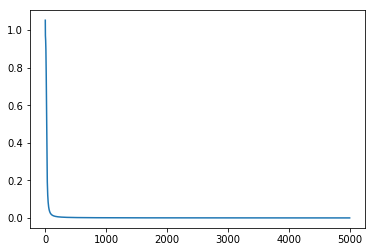

final weights, layer 1:  [[ -3.47208711   0.93523538  -0.23799908   4.63325429]
 [  5.55533742  -1.85494697   2.00046719 -11.3984584 ]
 [  0.49230374   0.16729134   0.46359771   1.71407888]]
final weights, layer 2:  [[-3.57728221]
 [ 4.97865444]
 [-3.28597584]
 [ 7.13410826]]


In [917]:
NN.trainthis(5000)

In [909]:
1 - NN.output*NN.output

array([[0.99955859, 0.02159631, 0.75171384, 0.74910069]])